## ROC curve for masked images

In [107]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import imutils
import time

In [2]:
df = pd.read_csv('WashingtonOBRace/corners2.csv',header = None)
df = df.drop_duplicates(subset=0)
df = df.reset_index()

image_name = []
centroid_lst = []
for i in range(len(df)):
    sum_x = df[1][i] + df[3][i] + df[5][i] + df[7][i]
    sum_y = df[2][i] + df[4][i] + df[6][i] + df[8][i]
    centroid = (np.floor_divide(sum_x, 4), np.floor_divide(sum_y, 4))
    image_name.append(df[0][i])
    centroid_lst.append(centroid)

centroids = np.array(centroid_lst)
image_names = np.array(image_name).reshape(len(image_name),1)
centroid_labels = np.hstack((image_names, centroids))

In [3]:
df = pd.read_csv('WashingtonOBRace/corners2.csv',header = None)
# df['centroid_x'], df['centroid_y'] = (np.floor_divide(df[1] + df[3] + df[5] + df[7], 4), np.floor_divide(df[2] + df[4] + df[6] + df[8], 4))
df['centroid_x'], df['centroid_y'] = round((df[1] + df[3] + df[5] + df[7]) / 4), round((df[2] + df[4] + df[6] + df[8]) / 4)
df['check_file'] = 0
df['mask_centroid_x'] = 0
df['mask_centroid_y'] = 0
df['mask_area'] = 0
df

0    1    2    3    4    5    6    7    8       9  centroid_x  \
0     mask_10.png   99  179  172  179  173  241  101  251  4865.0       136.0   
1     mask_10.png   22  198   63  197   62  233   20  238  1572.5        42.0   
2     mask_11.png   97  201  170  199  172  262   97  273  5001.5       134.0   
3     mask_11.png   22  219   63  218   62  252   19  258  1526.0        42.0   
4    mask_110.png  161  128  212  131  209  182  158  181  2658.0       185.0   
..            ...  ...  ...  ...  ...  ...  ...  ...  ...     ...         ...   
684   mask_74.png  100  217  123  219  122  238  100  238   450.5       111.0   
685    mask_8.png   91  134  164  135  167  197   93  203  4820.5       129.0   
686    mask_8.png    4  147   47  149   49  185    6  186  1611.5        26.0   
687    mask_9.png  104  154  176  155  180  217  109  226  4808.5       142.0   
688    mask_9.png   22  172   67  173   68  208   23  211  1666.0        45.0   

     centroid_y  check_file  mask_centroid_x  mask_centroid_y  mask_area  
0         212.0           0                0                0          0  
1         216.0           0                0                0          0  
2         234.0           0                0                0          0  
3         237.0           0                0                0          0  
4         156.0           0                0                0          0  
..          ...         ...              ...              ...        ...  
684       228.0           0                0                0          0  
685       167.0           0                0                0          0  
686       167.0           0                0                0          0  
687       188.0           0                0                0          0  
688       191.0           0                0                0          0  

[689 rows x 16 columns]

mask_10.png


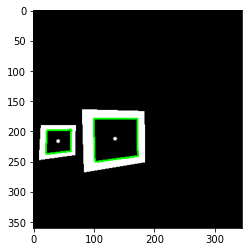

mask_11.png


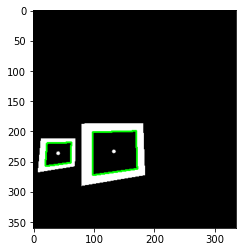

mask_110.png


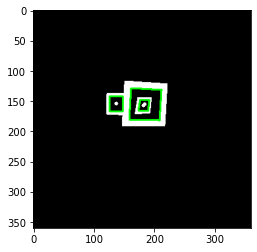

mask_111.png


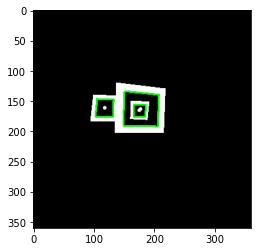

mask_112.png


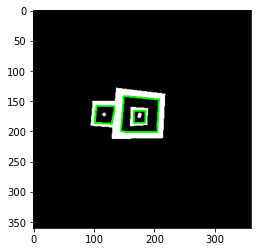

mask_113.png


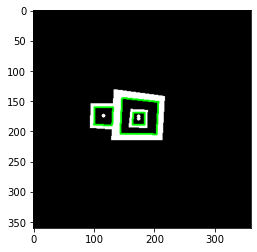

mask_114.png


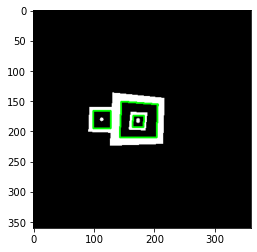

mask_115.png


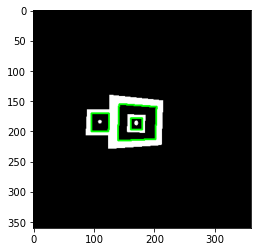

mask_116.png


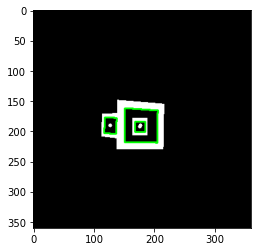

mask_117.png


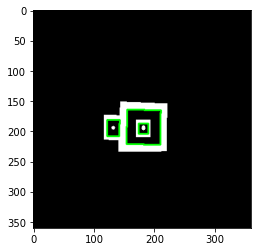

mask_119.png


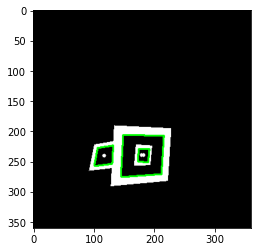

mask_12.png


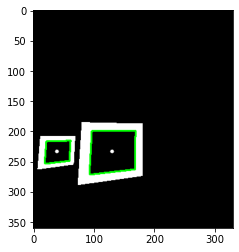

mask_124.png


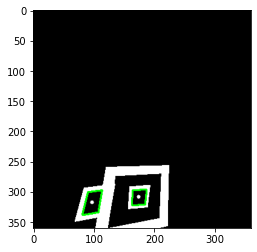

mask_125.png


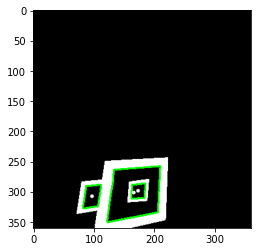

mask_126.png


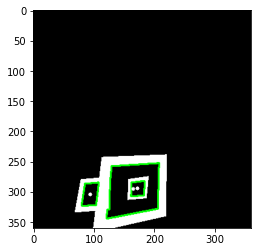

mask_127.png


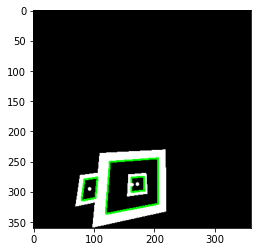

mask_128.png


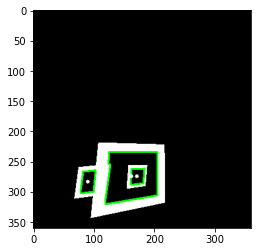

mask_129.png


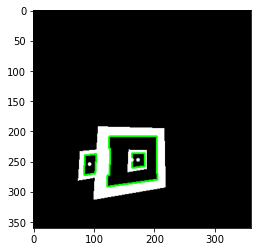

mask_13.png


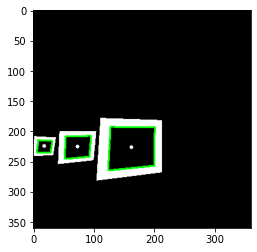

mask_130.png


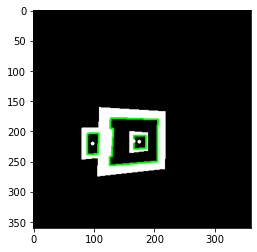

mask_131.png


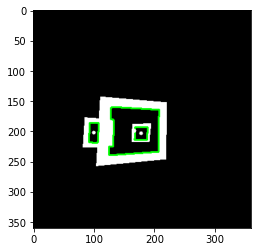

mask_132.png


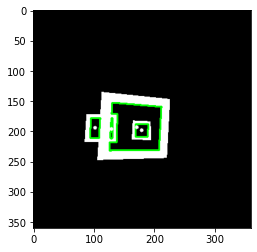

mask_133.png


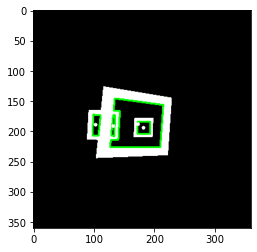

mask_134.png


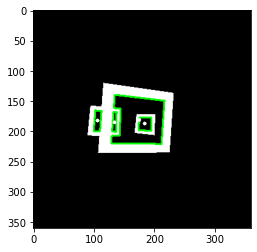

mask_135.png


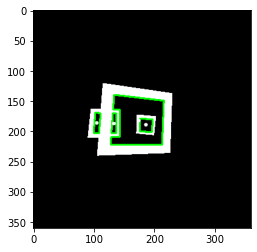

mask_136.png


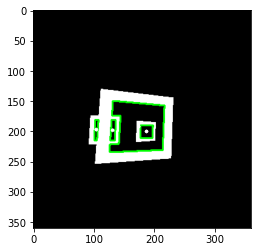

mask_137.png


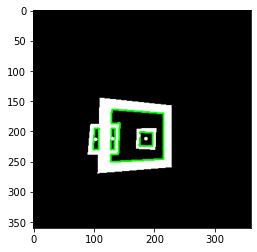

mask_138.png


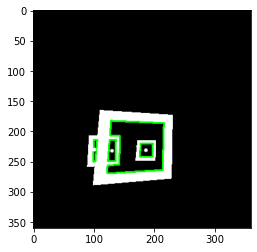

mask_139.png


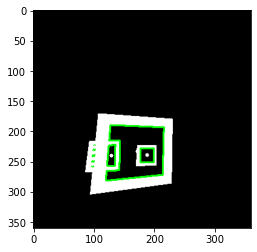

mask_14.png


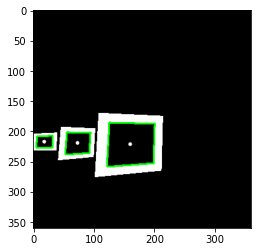

mask_140.png


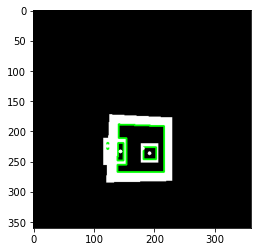

mask_141.png


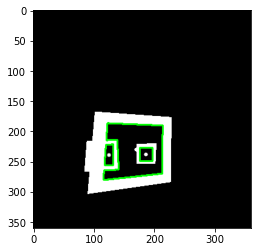

mask_142.png


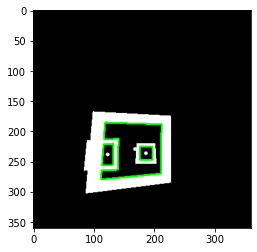

mask_143.png


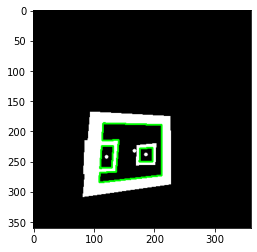

mask_144.png


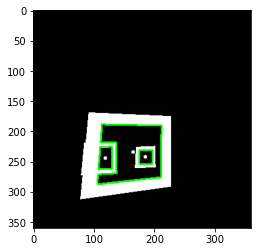

mask_145.png


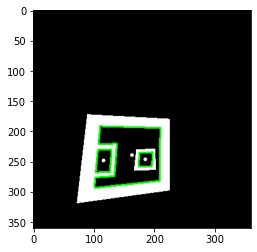

mask_146.png


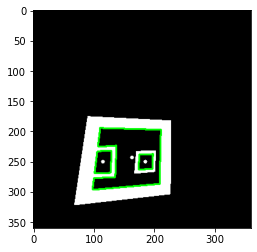

mask_147.png


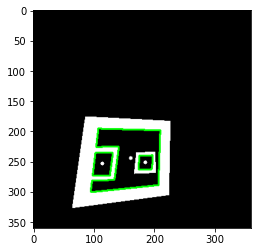

mask_148.png


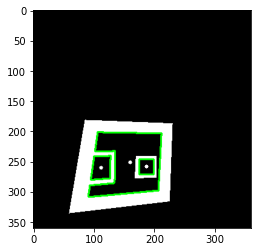

mask_149.png


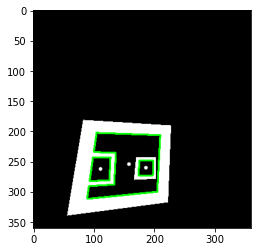

mask_150.png


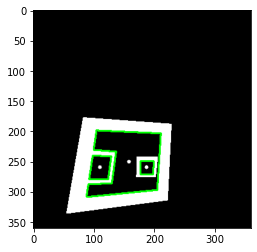

mask_151.png


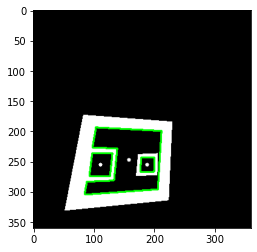

mask_152.png


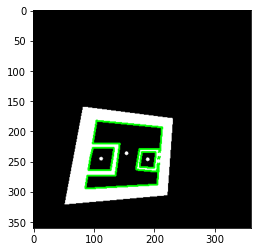

mask_153.png


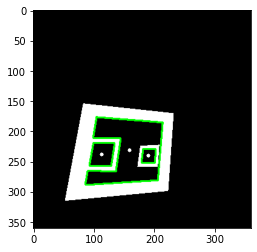

mask_154.png


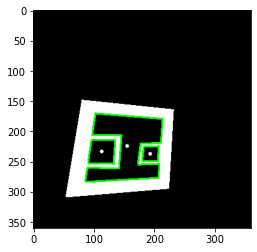

mask_155.png


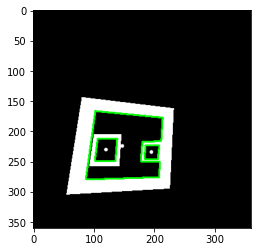

mask_156.png


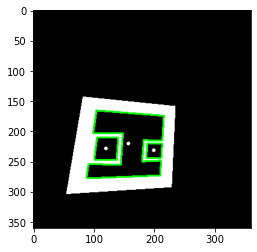

mask_157.png


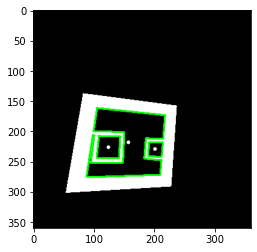

mask_158.png


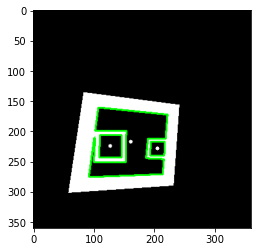

mask_159.png


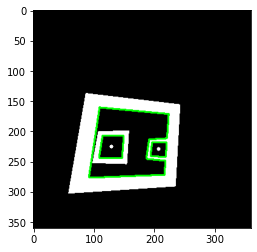

mask_160.png


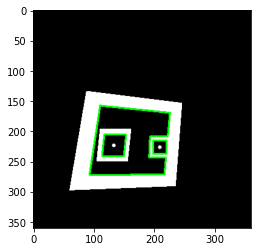

mask_161.png


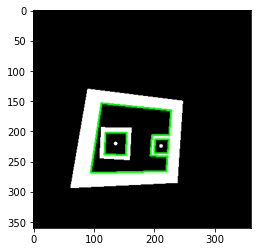

mask_162.png


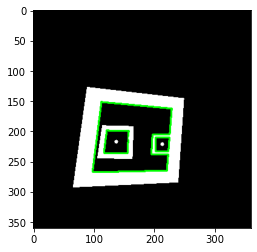

mask_163.png


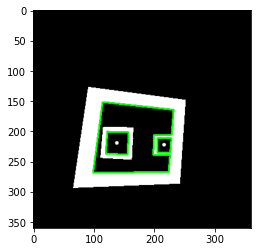

mask_164.png


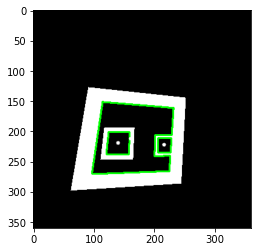

mask_165.png


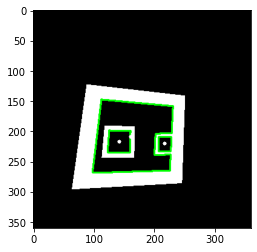

mask_166.png


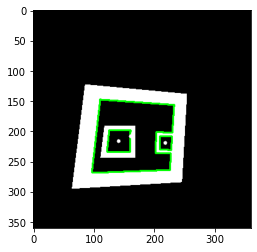

mask_167.png


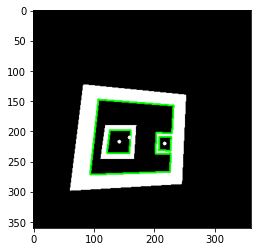

mask_168.png


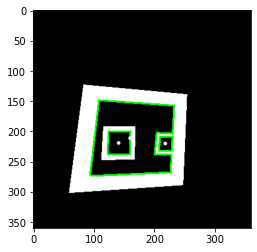

mask_169.png


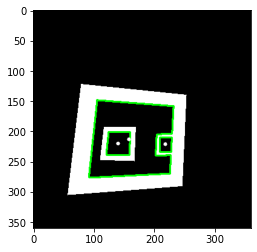

mask_170.png


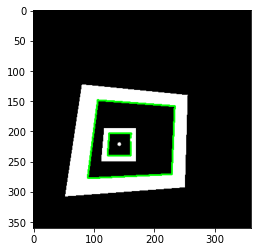

mask_171.png


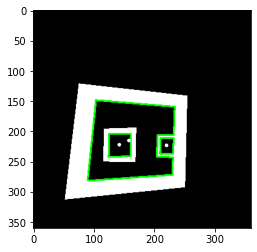

mask_172.png


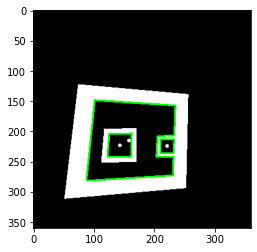

mask_173.png


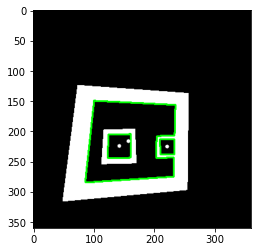

mask_174.png


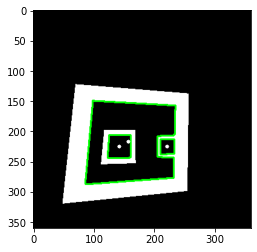

mask_175.png


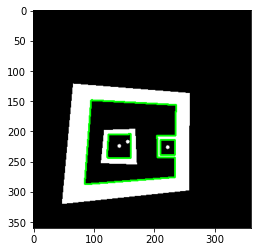

mask_176.png


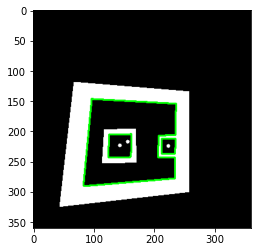

mask_177.png


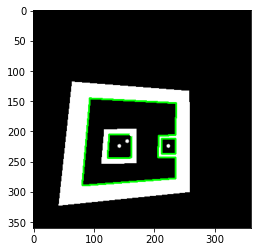

mask_178.png


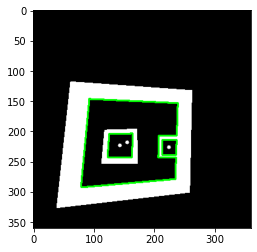

mask_179.png


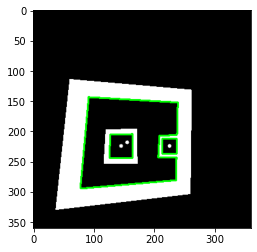

mask_18.png


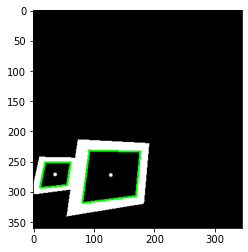

mask_180.png


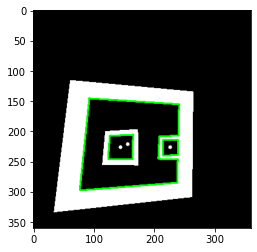

mask_181.png


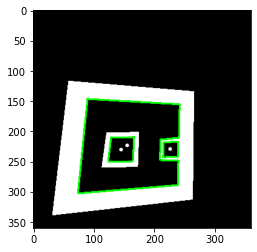

mask_182.png


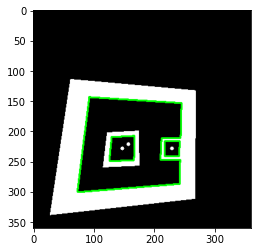

mask_183.png


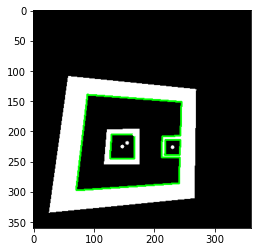

mask_184.png


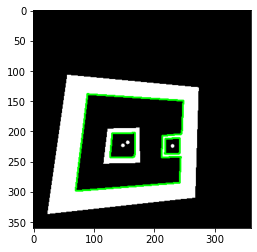

mask_185.png


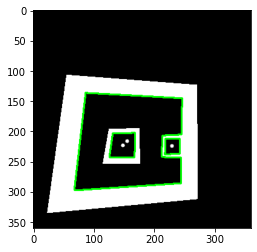

mask_186.png


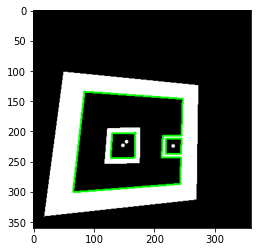

mask_187.png


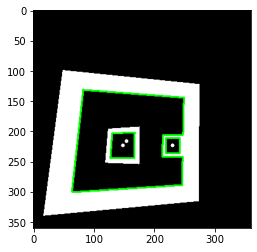

mask_188.png


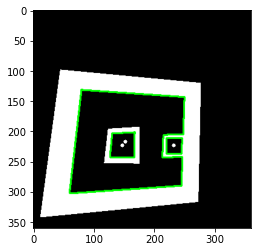

mask_189.png


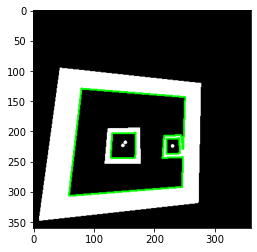

mask_19.png


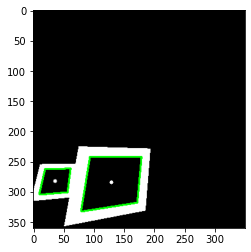

mask_190.png


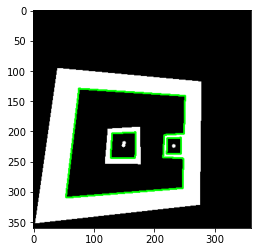

mask_191.png


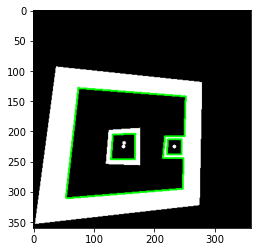

mask_192.png


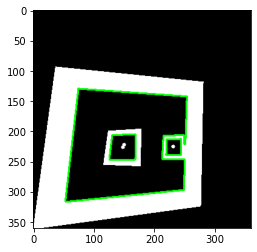

mask_193.png


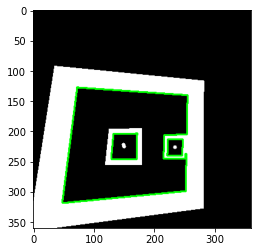

mask_194.png


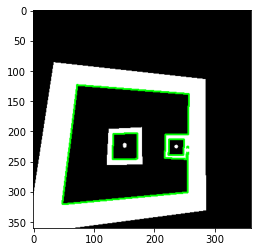

mask_195.png


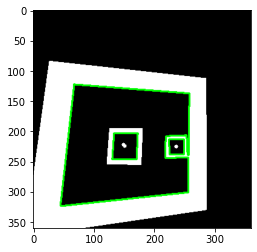

mask_196.png


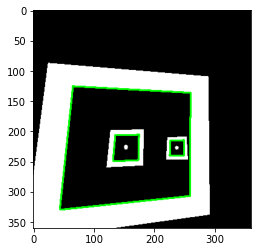

mask_197.png


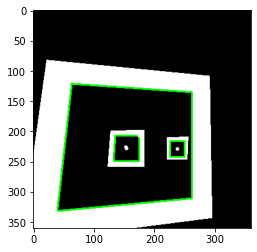

mask_198.png


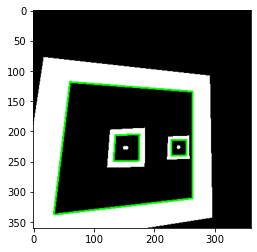

mask_199.png


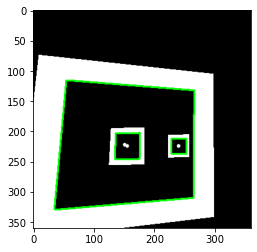

mask_20.png


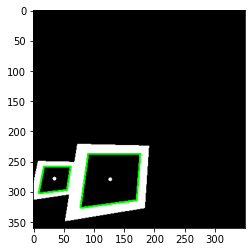

mask_200.png


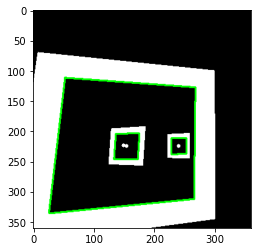

mask_202.png


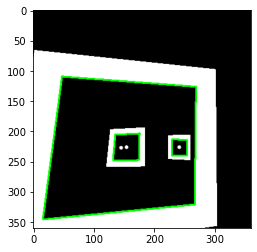

mask_203.png


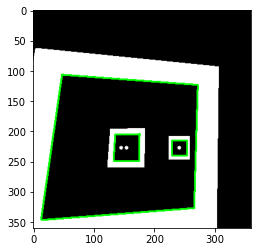

mask_204.png


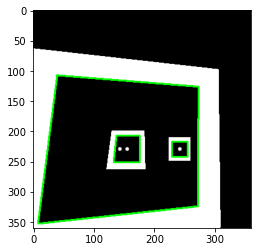

mask_205.png


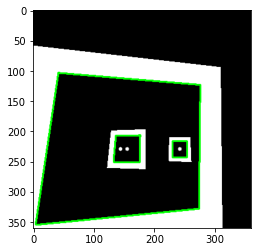

mask_21.png


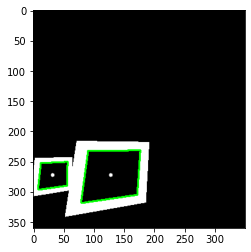

mask_22.png


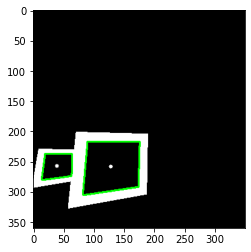

mask_23.png


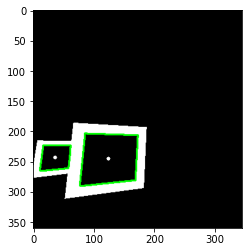

mask_232.png


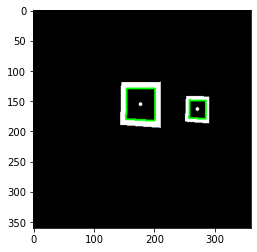

mask_233.png


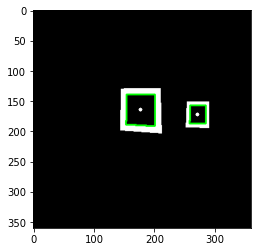

mask_234.png


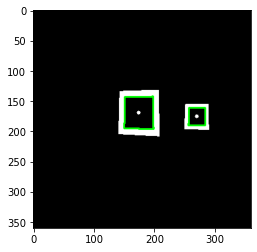

mask_235.png


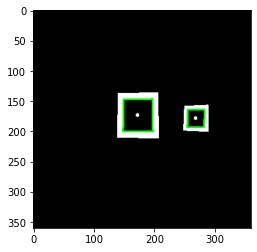

mask_236.png


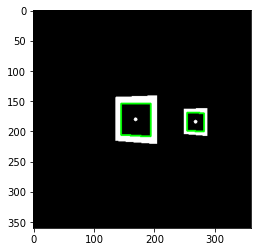

mask_237.png


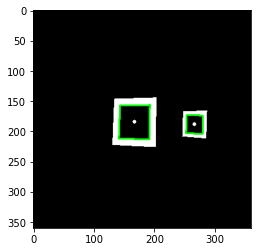

mask_238.png


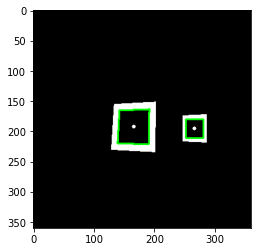

mask_239.png


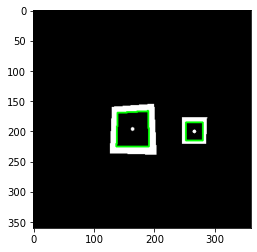

mask_24.png


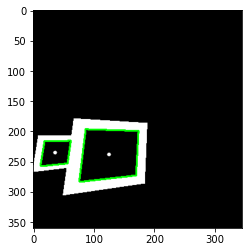

mask_240.png


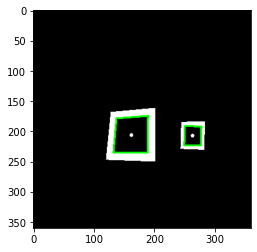

mask_241.png


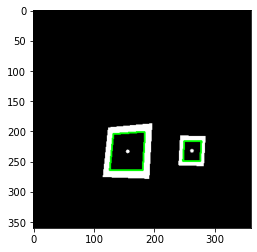

mask_242.png


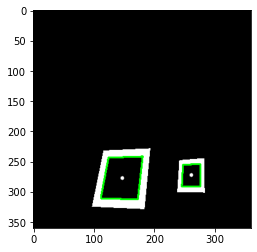

mask_243.png


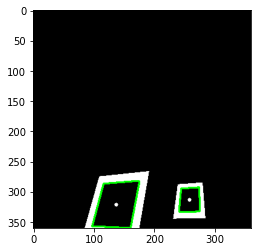

mask_246.png


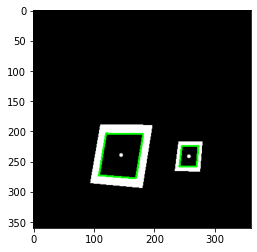

mask_247.png


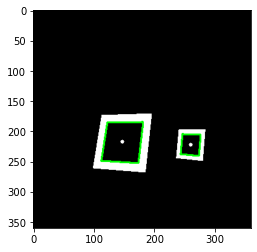

mask_248.png


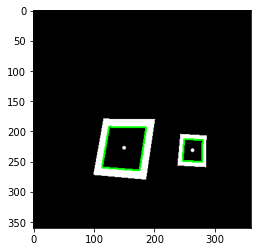

mask_249.png


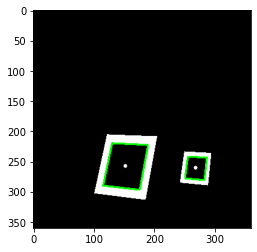

mask_25.png


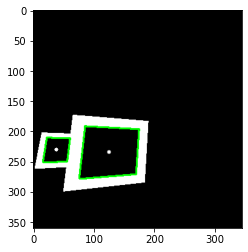

mask_250.png


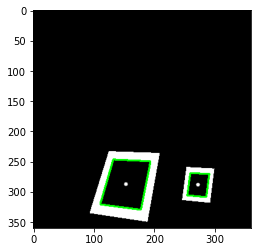

mask_251.png


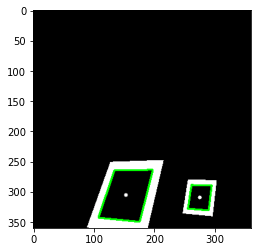

mask_252.png


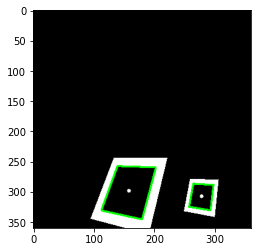

mask_253.png


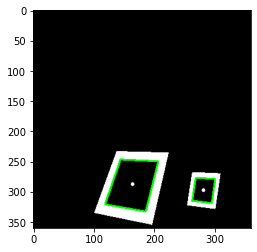

mask_254.png


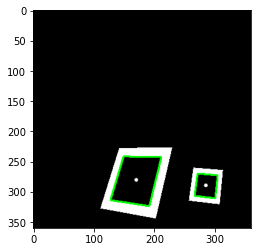

mask_255.png


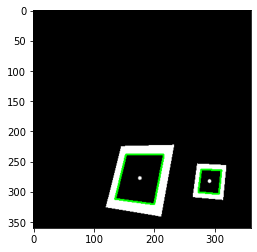

mask_256.png


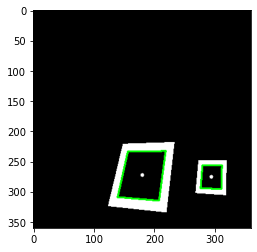

mask_257.png


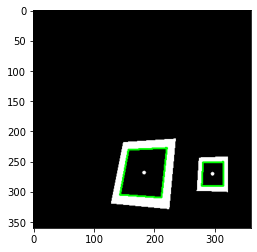

mask_258.png


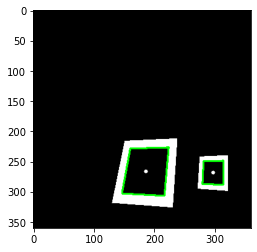

mask_259.png


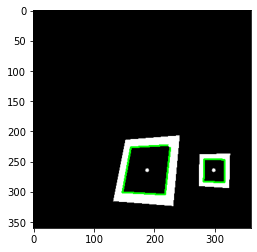

mask_26.png


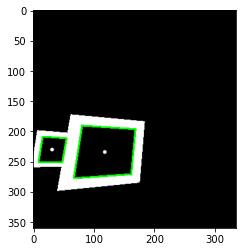

mask_260.png


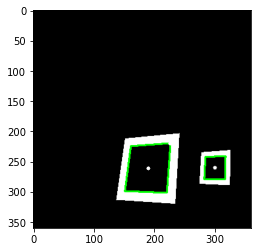

mask_261.png


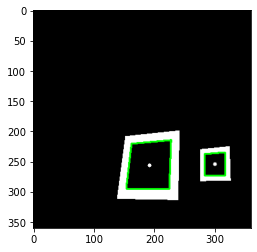

mask_262.png


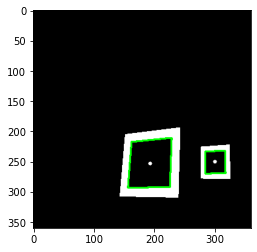

mask_263.png


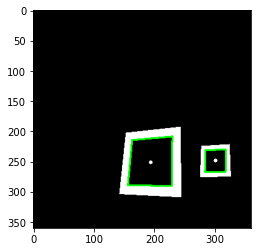

mask_264.png


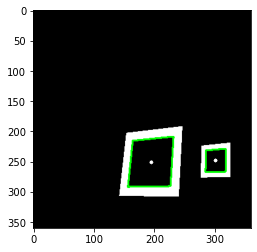

mask_265.png


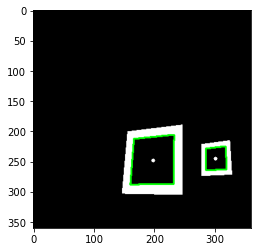

mask_266.png


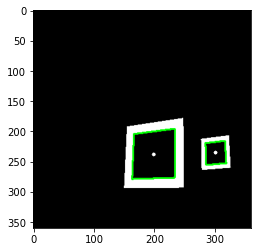

mask_267.png


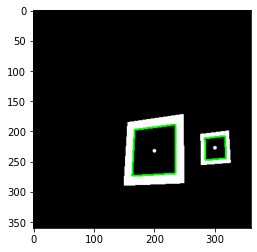

mask_268.png


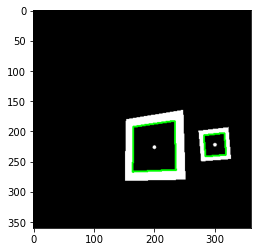

mask_269.png


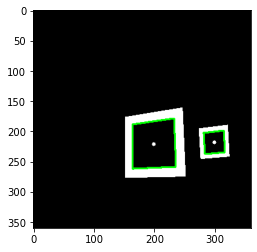

mask_27.png


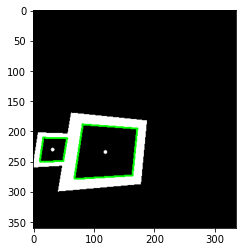

mask_270.png


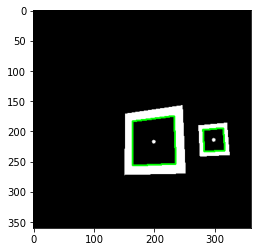

mask_271.png


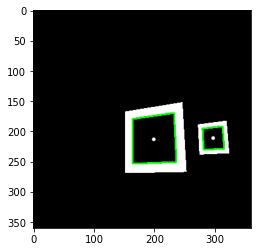

mask_272.png


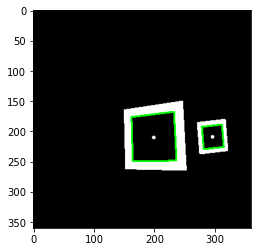

mask_273.png


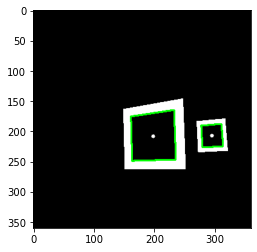

mask_274.png


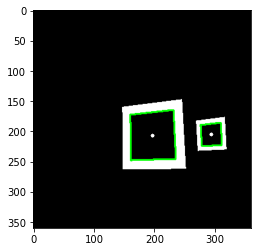

mask_275.png


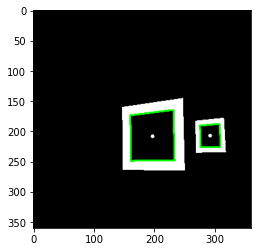

mask_276.png


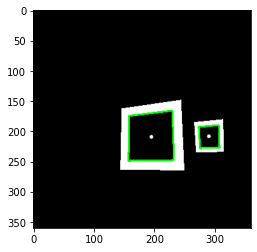

mask_277.png


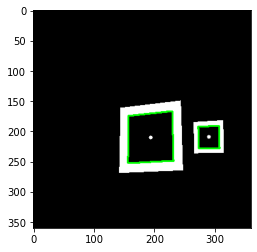

mask_278.png


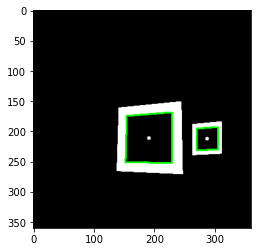

mask_279.png


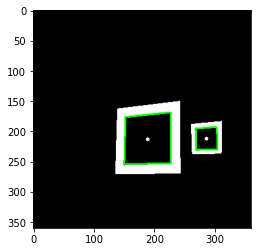

mask_28.png


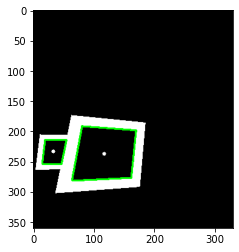

mask_280.png


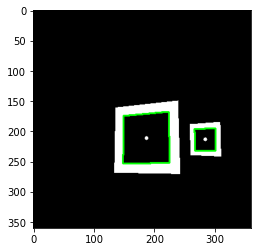

mask_281.png


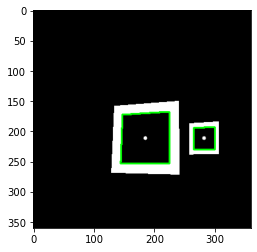

mask_282.png


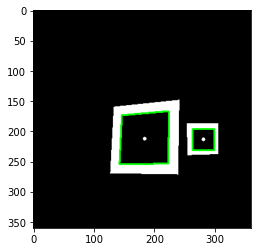

mask_283.png


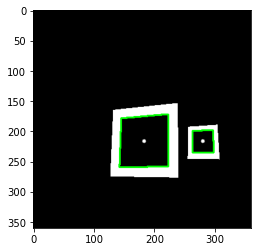

mask_284.png


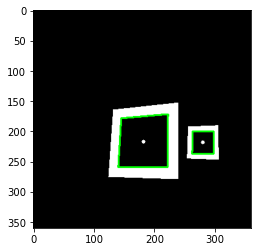

mask_285.png


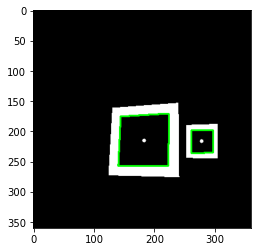

mask_286.png


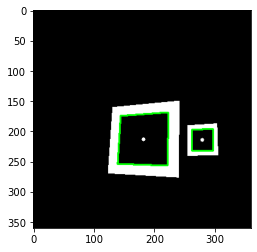

mask_287.png


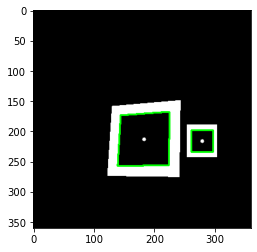

mask_288.png


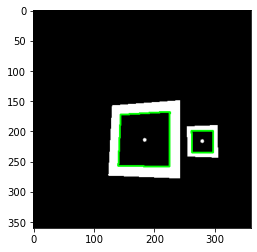

mask_289.png


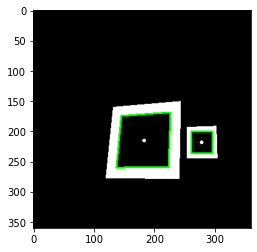

mask_29.png


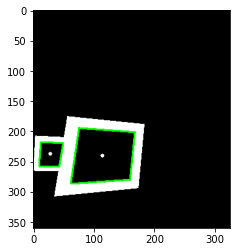

mask_290.png


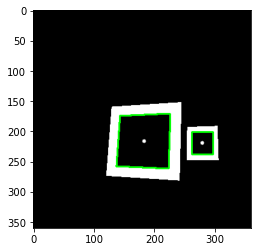

mask_291.png


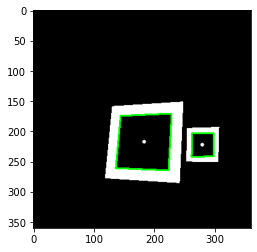

mask_292.png


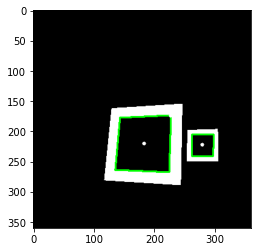

mask_293.png


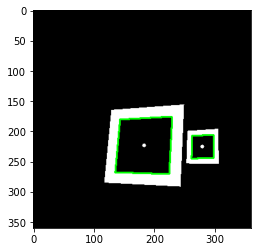

mask_294.png


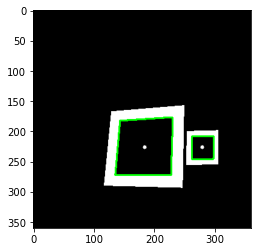

mask_295.png


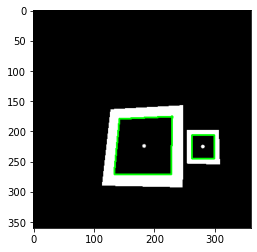

mask_296.png


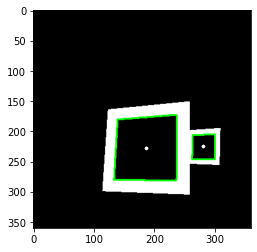

mask_297.png


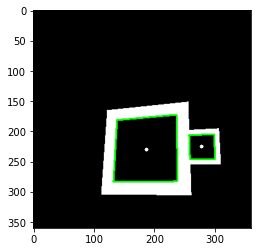

mask_298.png


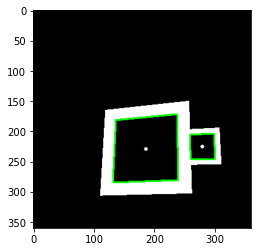

mask_299.png


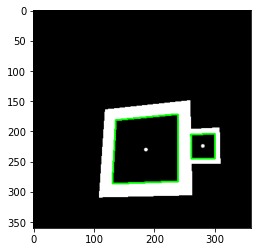

mask_300.png


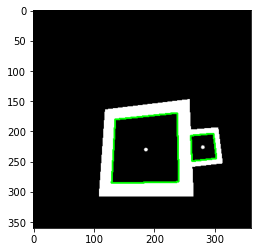

mask_301.png


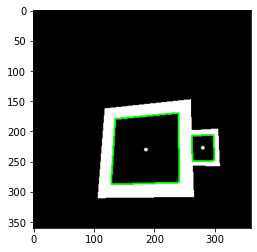

mask_302.png


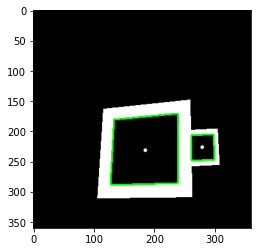

mask_303.png


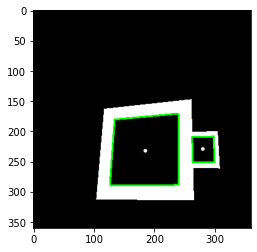

mask_304.png


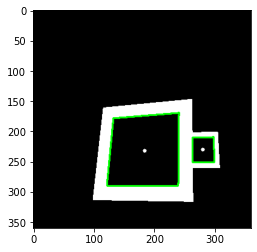

mask_305.png


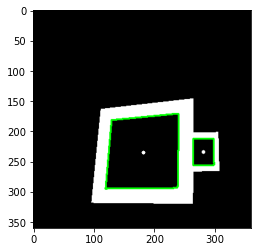

mask_306.png


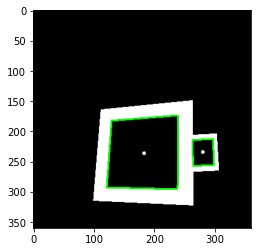

mask_307.png


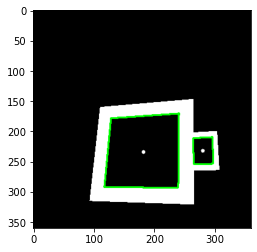

mask_308.png


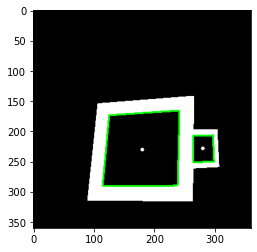

mask_309.png


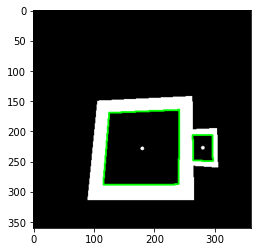

mask_31.png


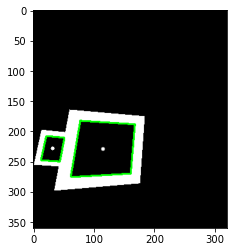

mask_310.png


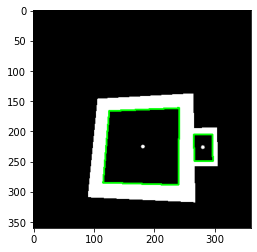

mask_311.png


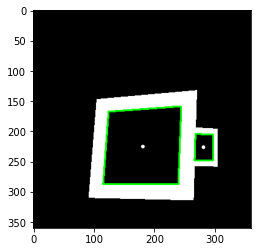

mask_312.png


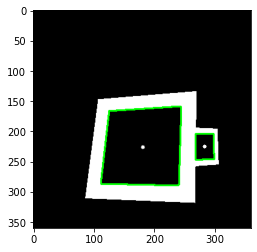

mask_313.png


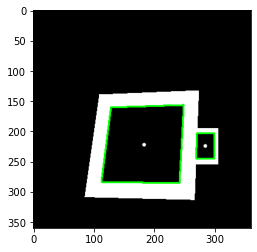

mask_314.png


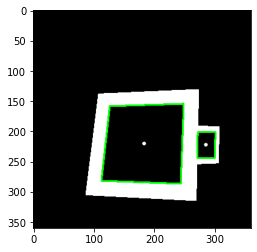

mask_315.png


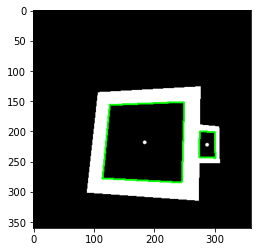

mask_316.png


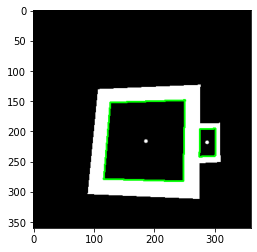

mask_317.png


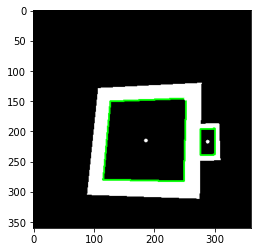

mask_318.png


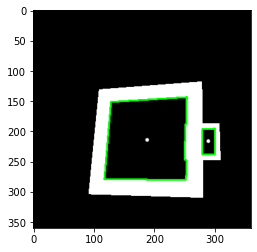

mask_319.png


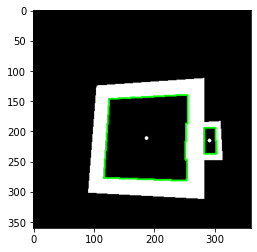

mask_32.png


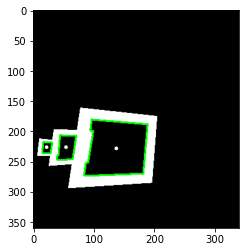

mask_320.png


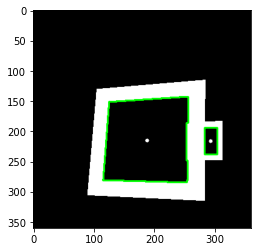

mask_321.png


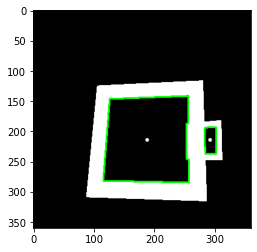

mask_322.png


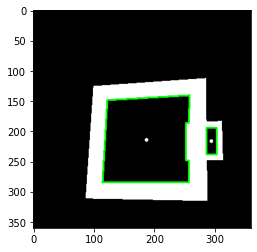

mask_323.png


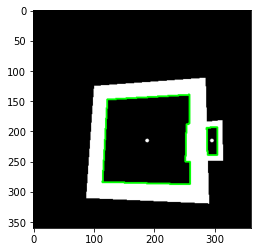

mask_324.png


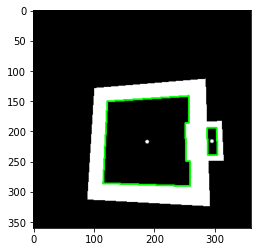

mask_325.png


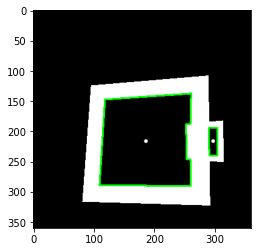

mask_326.png


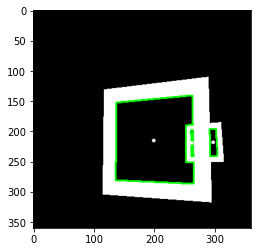

mask_327.png


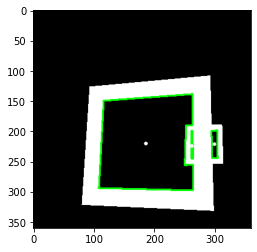

mask_328.png


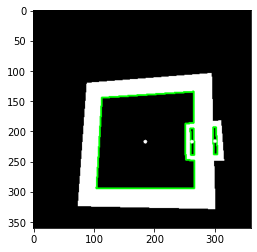

mask_329.png


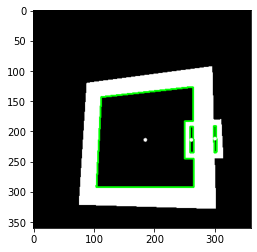

mask_33.png


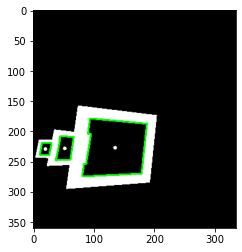

mask_330.png


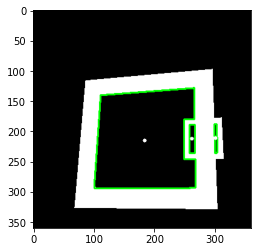

mask_331.png


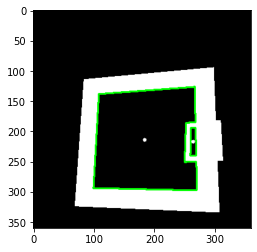

mask_34.png


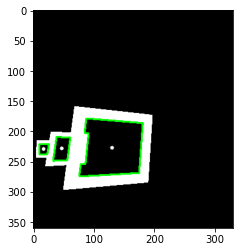

mask_35.png


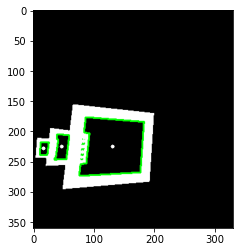

mask_36.png


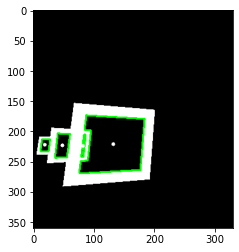

mask_37.png


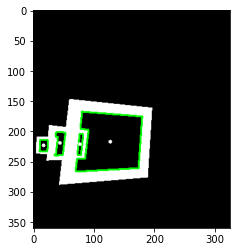

mask_370.png


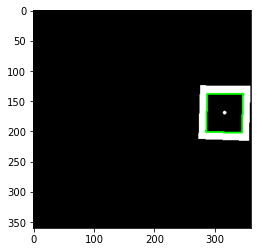

mask_371.png


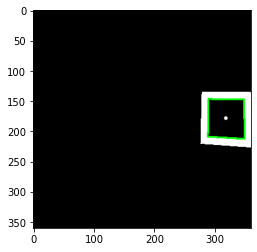

mask_372.png


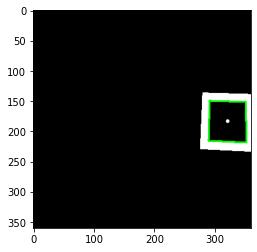

mask_373.png


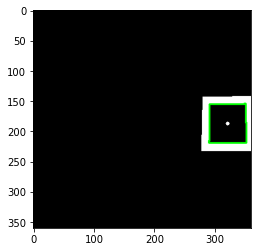

mask_374.png


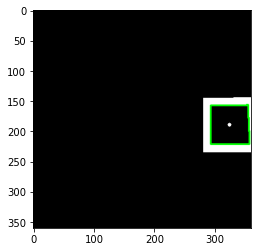

mask_375.png


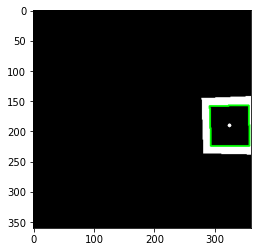

mask_376.png


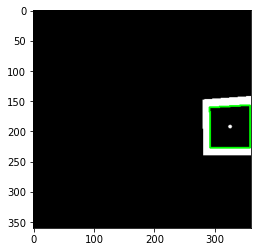

mask_382.png


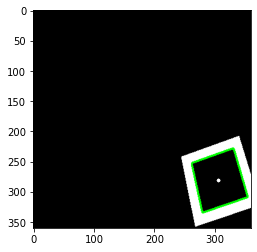

mask_383.png


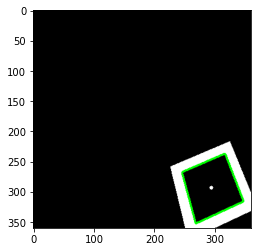

mask_384.png


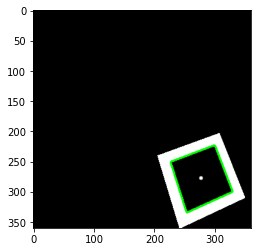

mask_385.png


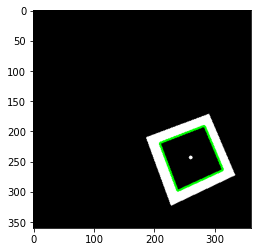

mask_386.png


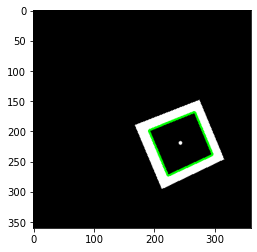

mask_387.png


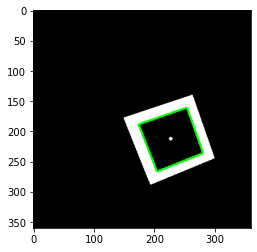

mask_388.png


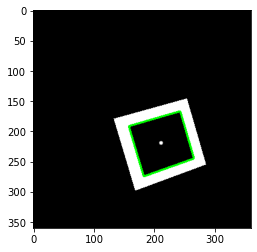

mask_389.png


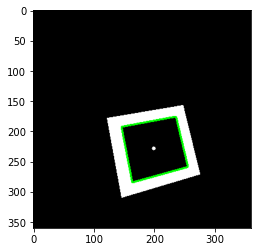

mask_39.png


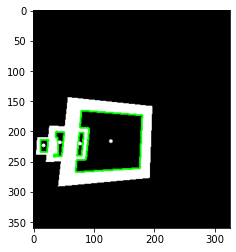

mask_390.png


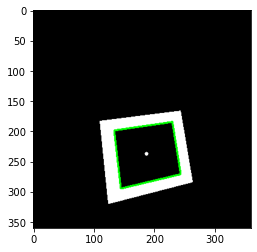

mask_391.png


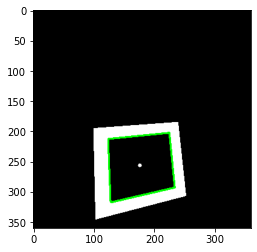

mask_392.png


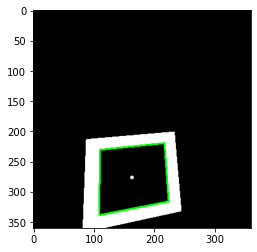

mask_393.png


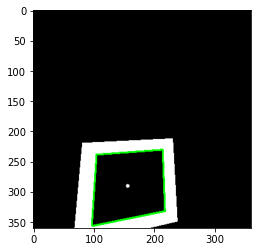

mask_396.png


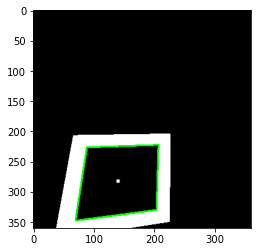

mask_397.png


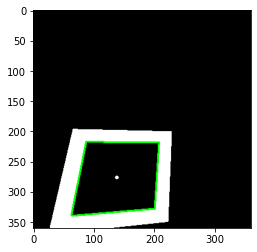

mask_398.png


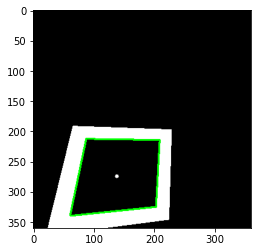

mask_399.png


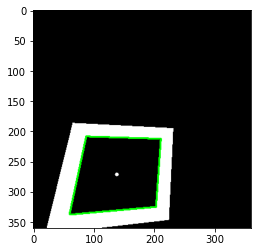

mask_400.png


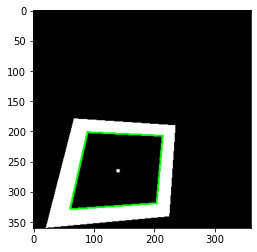

mask_401.png


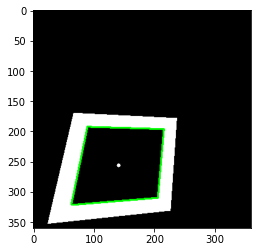

mask_402.png


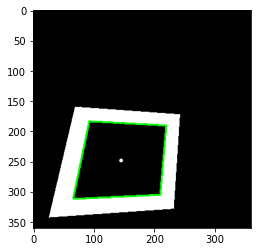

mask_403.png


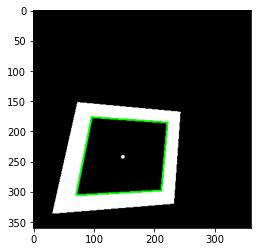

mask_404.png


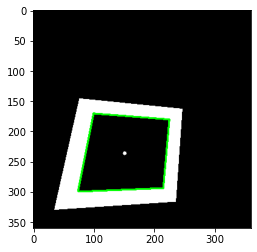

mask_405.png


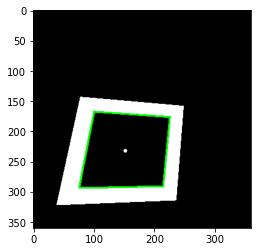

mask_406.png


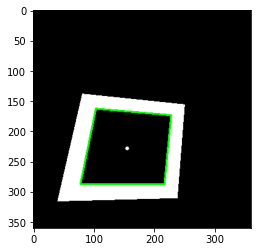

mask_407.png


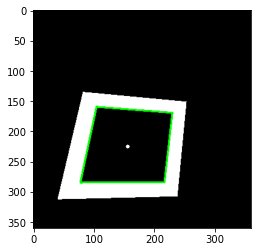

mask_408.png


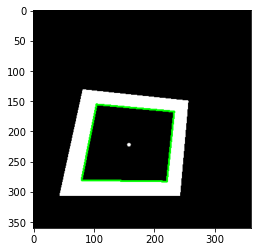

mask_409.png


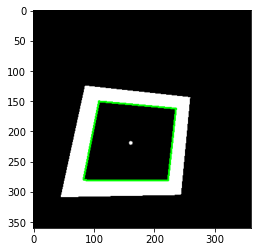

mask_41.png


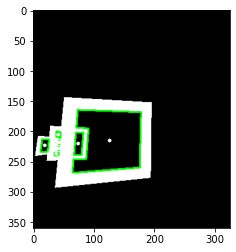

mask_410.png


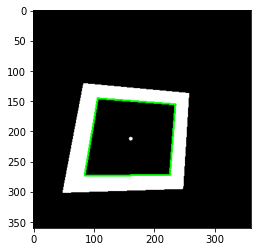

mask_411.png


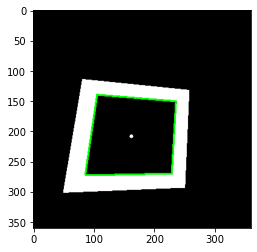

mask_412.png


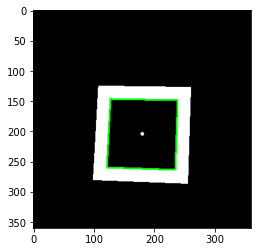

mask_413.png


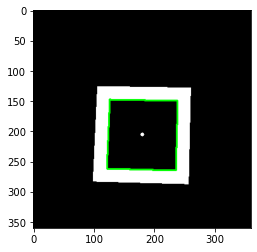

mask_414.png


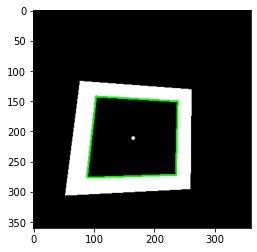

mask_415.png


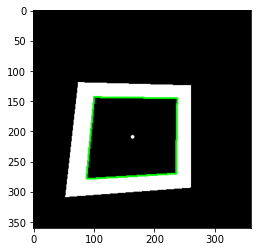

mask_416.png


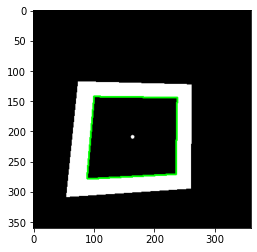

mask_417.png


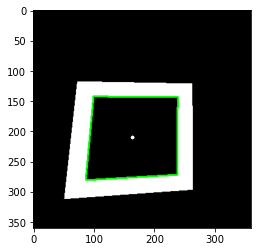

mask_418.png


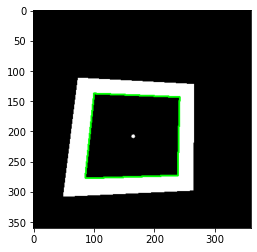

mask_419.png


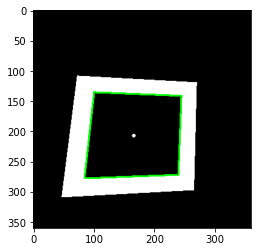

mask_42.png


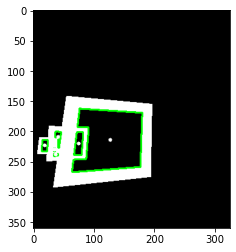

mask_420.png


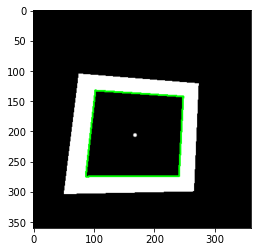

mask_421.png


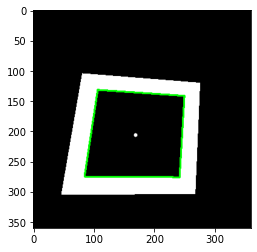

mask_422.png


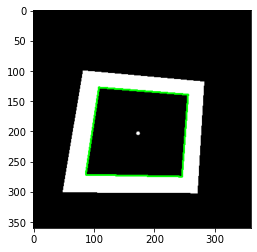

mask_423.png


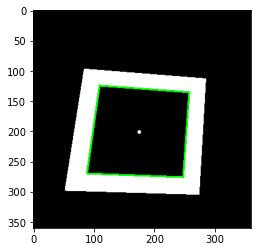

mask_424.png


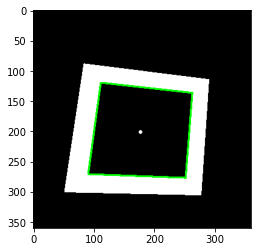

mask_425.png


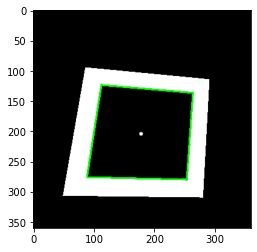

mask_426.png


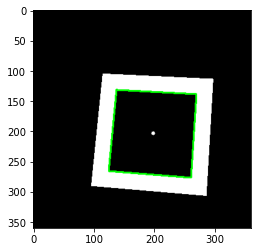

mask_427.png


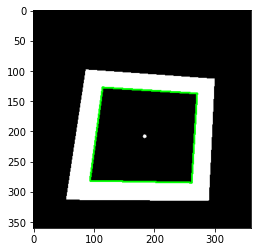

mask_428.png


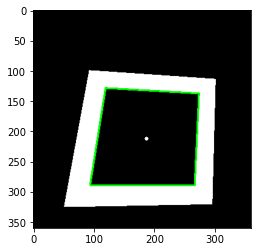

mask_429.png


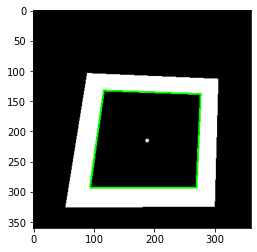

mask_43.png


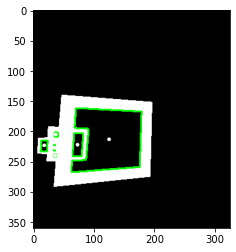

mask_430.png


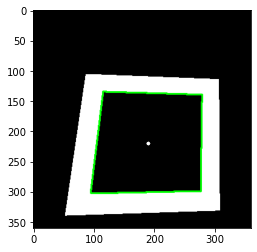

mask_431.png


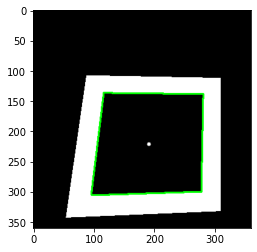

mask_432.png


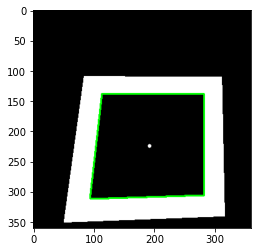

mask_433.png


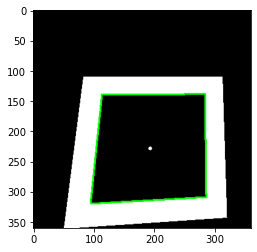

mask_434.png


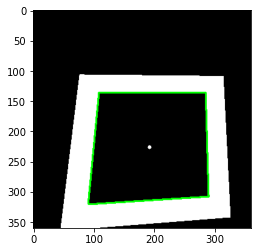

mask_435.png


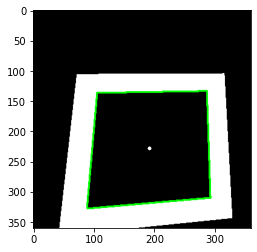

mask_436.png


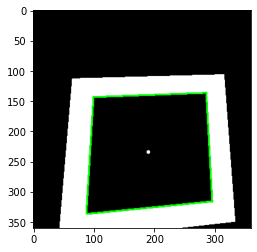

mask_437.png


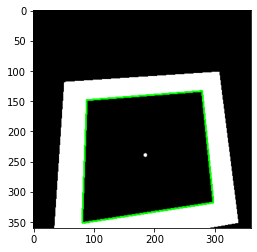

mask_45.png


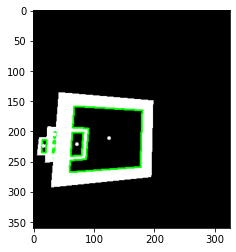

mask_46.png


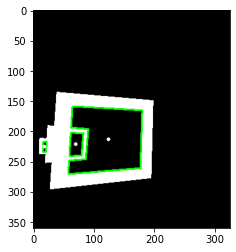

mask_47.png


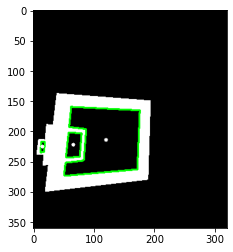

mask_48.png


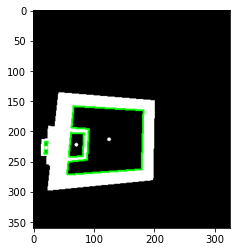

mask_51.png


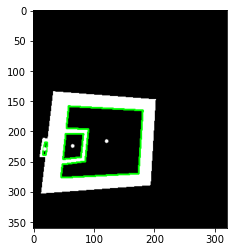

mask_52.png


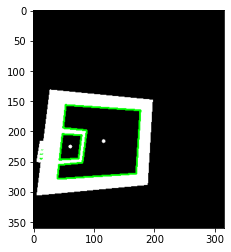

mask_53.png


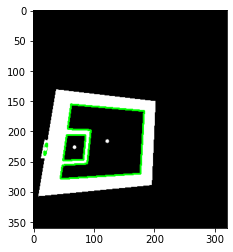

mask_54.png


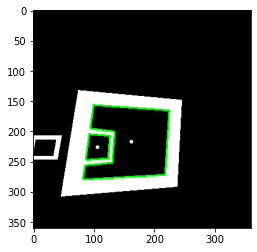

mask_55.png


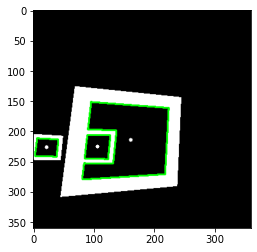

mask_56.png


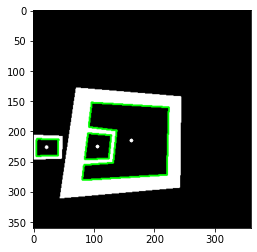

mask_57.png


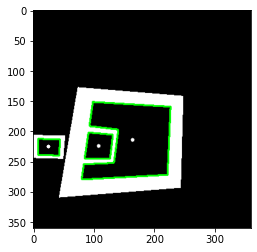

mask_58.png


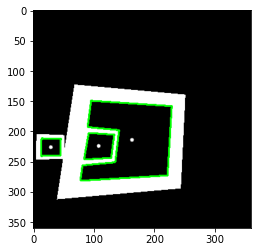

mask_59.png


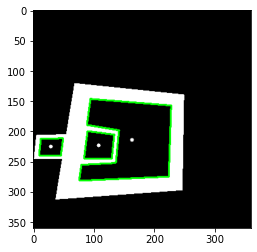

mask_6.png


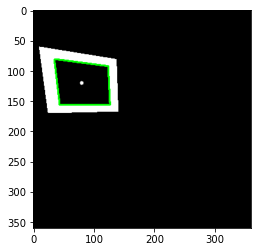

mask_60.png


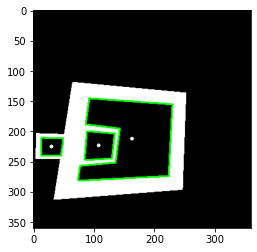

mask_61.png


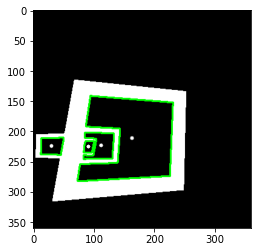

mask_62.png


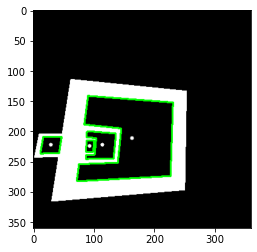

mask_63.png


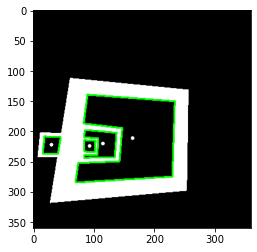

mask_64.png


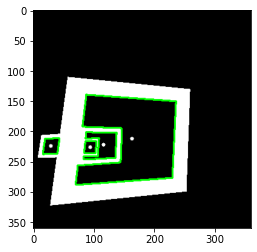

mask_65.png


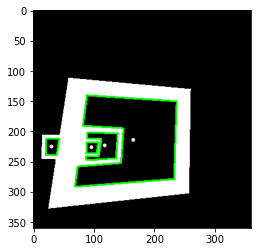

mask_66.png


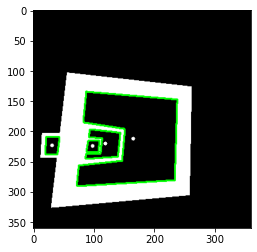

mask_67.png


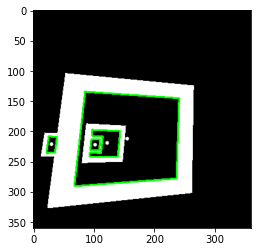

mask_68.png


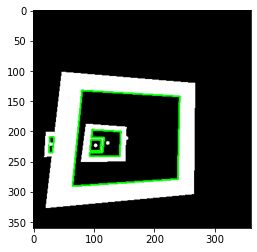

mask_69.png


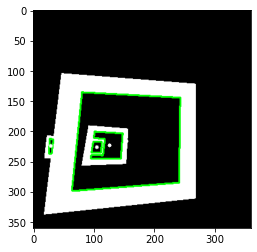

mask_71.png


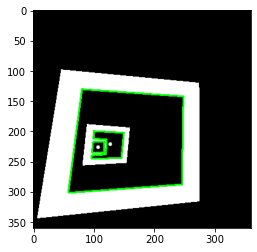

mask_72.png


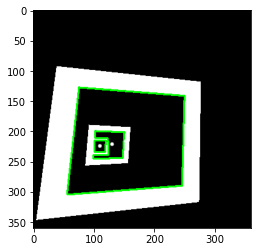

mask_73.png


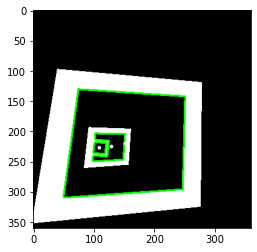

mask_74.png


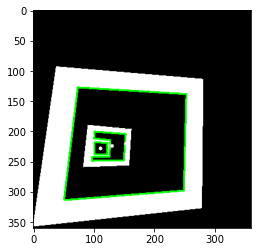

mask_8.png


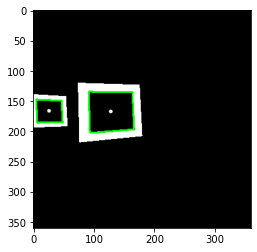

mask_9.png


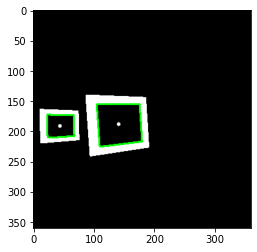

average time = 0.0006053327349187496


In [110]:
imdir = 'WashingtonOBRace3'
files = os.listdir(imdir)
centroid_mask = []
time_cumul = 0

for file in files:
    path = os.path.join(imdir, file)
    img = cv2.imread(path)
    
    start_time = time.time()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h,w = gray.shape
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

    # find contours in the thresholded image
    cnts, hierarchy = cv2.findContours(gray.copy(), cv2.RETR_CCOMP,
        cv2.CHAIN_APPROX_SIMPLE)
    
    end_time = time.time()
    time_cumul += end_time - start_time
    # cnts = imutils.grab_contours(cnts)
    
    # loop over the contours
    cX = 0
    cY = 0

    for b,c in enumerate(cnts):
        if hierarchy[0,b,3] != -1: ## Only take the inside contours using hierarchy
            #compute the center of the contour
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            end_time = time.time()
            time_cumul += end_time - start_time
            # draw the contour and center of the shape on the image
            cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
            cv2.circle(img, (cX, cY), 3, (255, 255, 255), -1)
            area = cv2.contourArea(c)
            centroid_mask.append([file,cX,cY, area])
    print(file)                
    plt.imshow(img)
    plt.show()
# centroid_mask = np.array(centroid_mask)
centroid_mask = pd.DataFrame(centroid_mask)
    
# plt.imshow(img)
# plt.show()
centroid_mask

avg_time = time_cumul / len(files) / len(cnts)
print('average time =', avg_time)

In [6]:
for i in range(len(df)):
#     for j in range(len(centroid_mask)):
    locs = centroid_mask.loc[centroid_mask[0] == df[0][i]]
#     locs2 = df.loc[locs[0] == ]
    locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
    locs = locs.reset_index()
    locmin = locs[['diff']].idxmin()
    print(i,locs, locmin)
    locmin = int(locmin)
#     if locmin.isnan() == False:
#         locmin = int(locmin)
    df['check_file'][i] = locs[0][locmin]
    df['mask_centroid_x'][i] = locs[1][locmin]
    df['mask_centroid_y'][i] = locs[2][locmin]
    df['mask_area'][i] = locs[3][locmin]
    
#     diff_lst = []
#     for j in range(len(locs)):
#         diff = abs(df['centroid_x'][i] - locs[1][j]) + abs(df['centroid_y'][i] - centroid_mask[2][j])
#         diff_lst.append(diff)
df.head
df.to_csv('masks_area.csv')

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

0    index            0    1    2       3  diff
0      0  mask_10.png   41  216  1355.5  99.0
1      1  mask_10.png  135  212  4505.0   1.0 diff    1
dtype: int64
1    index            0    1    2       3  diff
0      0  mask_10.png   41  216  1355.5   1.0
1      1  mask_10.png  135  212  4505.0  97.0 diff    0
dtype: int64
2    index            0    1    2       3  diff
0      2  mask_11.png   41  236  1319.5  95.0
1      3  mask_11.png  133  233  4584.0   2.0 diff    1
dtype: int64
3    index            0    1    2       3  diff
0      2  mask_11.png   41  236  1319.5   2.0
1      3  mask_11.png  133  233  4584.0  95.0 diff    0
dtype: int64
4    index             0    1    2       3  diff
0      4  mask_110.png  182  157   218.5   4.0
1      5  mask_110.png  137  154   458.0  50.0
2      6  mask_110.png  184  155  2365.0   2.0 diff    2
dtype: int64
5    index             0    1    2       3  diff
0      4  mask_110.png  182  157   218.5   1.0
1      5  mask_110.png  137  154   458.

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

18    index             0    1    2       3  diff
0     16  mask_114.png  173  183   274.0   2.0
1     17  mask_114.png  113  180   727.0  65.0
2     18  mask_114.png  173  181  3233.0   4.0 diff    0
dtype: int64
19    index             0    1    2       3  diff
0     19  mask_115.png  170  187   287.0   3.0
1     20  mask_115.png  110  184   752.5  64.0
2     21  mask_115.png  170  185  3316.0   3.0 diff    0
dtype: int64
20    index             0    1    2       3  diff
0     19  mask_115.png  170  187   287.0   1.0
1     20  mask_115.png  110  184   752.5  64.0
2     21  mask_115.png  170  185  3316.0   3.0 diff    0
dtype: int64
21    index             0    1    2       3  diff
0     19  mask_115.png  170  187   287.0  59.0
1     20  mask_115.png  110  184   752.5   4.0
2     21  mask_115.png  170  185  3316.0  57.0 diff    1
dtype: int64
22    index             0    1    2       3  diff
0     22  mask_116.png  176  192   223.0   3.0
1     23  mask_116.png  127  190   429.0  52.0


<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

39    index             0    1    2       3  diff
0     38  mask_126.png  172  294   422.5   8.0
1     39  mask_126.png   94  304   754.5  80.0
2     40  mask_126.png  165  295  6184.0   2.0 diff    2
dtype: int64
40    index             0    1    2       3  diff
0     38  mask_126.png  172  294   422.5   2.0
1     39  mask_126.png   94  304   754.5  88.0
2     40  mask_126.png  165  295  6184.0   8.0 diff    0
dtype: int64
41    index             0    1    2       3  diff
0     38  mask_126.png  172  294   422.5  82.0
1     39  mask_126.png   94  304   754.5   6.0
2     40  mask_126.png  165  295  6184.0  74.0 diff    1
dtype: int64
42    index             0    1    2       3  diff
0     41  mask_127.png  172  287   411.0   9.0
1     42  mask_127.png   93  295   655.0  78.0
2     43  mask_127.png  163  288  6350.0   1.0 diff    2
dtype: int64
43    index             0    1    2       3  diff
0     41  mask_127.png  172  287   411.0  80.0
1     42  mask_127.png   93  295   655.0   7.0


<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_area'][i] = locs[3][locmin]
<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['

    index             0    1    2       3  diff
0     56  mask_131.png  178  203   349.5  70.0
1     57  mask_131.png  100  202   396.5   9.0
2     58  mask_131.png  167  199  5433.5  61.0 diff    1
dtype: int64
59    index             0    1    2       3  diff
0     56  mask_131.png  178  203   349.5   0.0
1     57  mask_131.png  100  202   396.5  79.0
2     58  mask_131.png  167  199  5433.5  15.0 diff    0
dtype: int64
60    index             0    1    2       3  diff
0     59  mask_132.png  179  198   348.5  14.0
1     60  mask_132.png  129  205    16.0  51.0
2     61  mask_132.png  102  194   403.0  67.0
3     62  mask_132.png  171  193  5323.5   3.0 diff    3
dtype: int64
61    index             0    1    2       3  diff
0     59  mask_132.png  179  198   348.5   0.0
1     60  mask_132.png  129  205    16.0  57.0
2     61  mask_132.png  102  194   403.0  81.0
3     62  mask_132.png  171  193  5323.5  13.0 diff    0
dtype: int64
62    index             0    1    2       3  diff
0 

<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_area'][i] = locs[3][locmin]
<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['

79    index             0    1    2       3  diff
0     83  mask_138.png  186  231   368.5   2.0
1     84  mask_138.png  130  232   311.0  57.0
2     85  mask_138.png  101  230    82.5  88.0
3     86  mask_138.png  174  224  6127.5  21.0 diff    0
dtype: int64
80    index             0    1    2       3  diff
0     83  mask_138.png  186  231   368.5  69.0
1     84  mask_138.png  130  232   311.0  12.0
2     85  mask_138.png  101  230    82.5  19.0
3     86  mask_138.png  174  224  6127.5  64.0 diff    1
dtype: int64
81    index             0    1    2       3  diff
0     87  mask_139.png  188  239   418.0  24.0
1     88  mask_139.png  129  240   320.5  46.0
2     89  mask_139.png  173  233  6400.0   5.0 diff    2
dtype: int64
82    index             0    1    2       3  diff
0     87  mask_139.png  188  239   418.0   1.0
1     88  mask_139.png  129  240   320.5  59.0
2     89  mask_139.png  173  233  6400.0  22.0 diff    0
dtype: int64
83    index             0    1    2       3  diff


<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_area'][i] = locs[3][locmin]
<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['che

97    index             0    1    2       3  diff
0    102  mask_143.png  186  238   387.5  78.0
1    103  mask_143.png  121  241   589.0  10.0
2    104  mask_143.png  167  232  7201.0  65.0 diff    1
dtype: int64
98    index             0    1    2       3  diff
0    102  mask_143.png  186  238   387.5   1.0
1    103  mask_143.png  121  241   589.0  67.0
2    104  mask_143.png  167  232  7201.0  26.0 diff    0
dtype: int64
99    index             0    1    2       3  diff
0    105  mask_144.png  186  242   418.0  32.0
1    106  mask_144.png  119  244   648.5  49.0
2    107  mask_144.png  166  234  7471.0   8.0 diff    2
dtype: int64
100    index             0    1    2       3  diff
0    105  mask_144.png  186  242   418.0   0.0
1    106  mask_144.png  119  244   648.5  69.0
2    107  mask_144.png  166  234  7471.0  28.0 diff    0
dtype: int64
101    index             0    1    2       3  diff
0    105  mask_144.png  186  242   418.0  78.0
1    106  mask_144.png  119  244   648.5   9.

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

 diff    0
dtype: int64
117    index             0    1    2       3  diff
0    123  mask_150.png  205  264    16.0  65.0
1    124  mask_150.png  206  252     6.0  54.0
2    125  mask_150.png  187  259   388.5  42.0
3    126  mask_150.png  110  259  1065.0  49.0
4    127  mask_150.png  154  249  7524.0   5.0 diff    4
dtype: int64
118    index             0    1    2       3   diff
0    123  mask_150.png  205  264    16.0  100.0
1    124  mask_150.png  206  252     6.0  105.0
2    125  mask_150.png  187  259   388.5   79.0
3    126  mask_150.png  110  259  1065.0    2.0
4    127  mask_150.png  154  249  7524.0   56.0 diff    3
dtype: int64
119    index             0    1    2       3  diff
0    123  mask_150.png  205  264    16.0  21.0
1    124  mask_150.png  206  252     6.0  26.0
2    125  mask_150.png  187  259   388.5   2.0
3    126  mask_150.png  110  259  1065.0  79.0
4    127  mask_150.png  154  249  7524.0  45.0 diff    2
dtype: int64
120    index             0    1    2       

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

136    index             0    1    2       3  diff
0    147  mask_156.png  199  232   499.0  81.0
1    148  mask_156.png  120  228  1197.0   2.0
2    149  mask_156.png  157  219  8013.5  46.0 diff    1
dtype: int64
137    index             0    1    2       3  diff
0    147  mask_156.png  199  232   499.0   1.0
1    148  mask_156.png  120  228  1197.0  84.0
2    149  mask_156.png  157  219  8013.5  56.0 diff    0
dtype: int64
138    index             0    1    2       3  diff
0    150  mask_157.png   94  247    10.0  88.0
1    151  mask_157.png   95  239     4.0  79.0
2    152  mask_157.png  201  229   446.0  55.0
3    153  mask_157.png  124  226  1159.0  37.0
4    154  mask_157.png  158  217  8166.0   6.0 diff    4
dtype: int64
139    index             0    1    2       3  diff
0    150  mask_157.png   94  247    10.0  51.0
1    151  mask_157.png   95  239     4.0  42.0
2    152  mask_157.png  201  229   446.0  80.0
3    153  mask_157.png  124  226  1159.0   0.0
4    154  mask_157.png

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

155    index             0    1    2        3  diff
0    172  mask_162.png  137  217   1253.0  82.0
1    173  mask_162.png  213  221    421.0   2.0
2    174  mask_162.png  159  210  11693.0  67.0 diff    1
dtype: int64
156    index             0    1    2        3  diff
0    175  mask_163.png  138  219   1161.0  35.0
1    176  mask_163.png  216  222    442.0  58.0
2    177  mask_163.png  161  212  11927.0   7.0 diff    2
dtype: int64
157    index             0    1    2        3  diff
0    175  mask_163.png  138  219   1161.0   1.0
1    176  mask_163.png  216  222    442.0  80.0
2    177  mask_163.png  161  212  11927.0  29.0 diff    0
dtype: int64
158    index             0    1    2        3  diff
0    175  mask_163.png  138  219   1161.0  83.0
1    176  mask_163.png  216  222    442.0   2.0
2    177  mask_163.png  161  212  11927.0  67.0 diff    1
dtype: int64
159    index             0    1    2        3  diff
0    178  mask_164.png  140  219   1192.0  34.0
1    179  mask_164.png  

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

173    index             0    1    2        3  diff
0    190  mask_168.png  141  219   1243.0  81.0
1    191  mask_168.png  218  220    393.0   3.0
2    192  mask_168.png  160  211  13686.5  70.0 diff    1
dtype: int64
174    index             0    1    2        3  diff
0    193  mask_169.png  140  220   1263.0  31.0
1    194  mask_169.png  218  221    379.5  62.0
2    195  mask_169.png  158  213  14176.0   6.0 diff    2
dtype: int64
175    index             0    1    2        3  diff
0    193  mask_169.png  140  220   1263.0   1.0
1    194  mask_169.png  218  221    379.5  78.0
2    195  mask_169.png  158  213  14176.0  24.0 diff    0
dtype: int64
176    index             0    1    2        3  diff
0    193  mask_169.png  140  220   1263.0  83.0
1    194  mask_169.png  218  221    379.5   4.0
2    195  mask_169.png  158  213  14176.0  72.0 diff    1
dtype: int64
177    index             0    1    2        3  diff
0    196  mask_170.png  142  221   1224.0  29.0
1    197  mask_170.png  

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

 diff    0
dtype: int64
190    index             0    1    2        3  diff
0    207  mask_174.png  142  225   1257.5  81.0
1    208  mask_174.png  221  225    470.5   2.0
2    209  mask_174.png  157  217  16595.0  74.0 diff    1
dtype: int64
191    index             0    1    2        3  diff
0    210  mask_175.png  141  224   1337.5  28.0
1    211  mask_175.png  222  226    504.0  69.0
2    212  mask_175.png  156  217  17029.0   6.0 diff    2
dtype: int64
192    index             0    1    2        3  diff
0    210  mask_175.png  141  224   1337.5   1.0
1    211  mask_175.png  222  226    504.0  82.0
2    212  mask_175.png  156  217  17029.0  21.0 diff    0
dtype: int64
193    index             0    1    2        3  diff
0    210  mask_175.png  141  224   1337.5  83.0
1    211  mask_175.png  222  226    504.0   0.0
2    212  mask_175.png  156  217  17029.0  75.0 diff    1
dtype: int64
194    index             0    1    2        3  diff
0    213  mask_176.png  143  224   1270.0  26.0


<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

 diff    2
dtype: int64
209    index             0    1    2        3  diff
0    227  mask_180.png  144  226   1399.0   1.0
1    228  mask_180.png  226  226    539.5  81.0
2    229  mask_180.png  155  221  19919.0  15.0 diff    0
dtype: int64
210    index             0    1    2        3  diff
0    227  mask_180.png  144  226   1399.0  84.0
1    228  mask_180.png  226  226    539.5   2.0
2    229  mask_180.png  155  221  19919.0  78.0 diff    1
dtype: int64
211    index             0    1    2        3  diff
0    230  mask_181.png  145  230   1428.5  23.0
1    231  mask_181.png  226  229    501.5  71.0
2    232  mask_181.png  155  223  21220.0   6.0 diff    2
dtype: int64
212    index             0    1    2        3  diff
0    230  mask_181.png  145  230   1428.5   1.0
1    231  mask_181.png  226  229    501.5  81.0
2    232  mask_181.png  155  223  21220.0  16.0 diff    0
dtype: int64
213    index             0    1    2        3  diff
0    230  mask_181.png  145  230   1428.5  82.0


<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

226    index             0    1    2        3  diff
0    245  mask_186.png  148  223   1441.5  18.0
1    246  mask_186.png  231  224    537.5  78.0
2    247  mask_186.png  154  217  24183.5   6.0 diff    2
dtype: int64
227    index             0    1    2        3  diff
0    245  mask_186.png  148  223   1441.5   1.0
1    246  mask_186.png  231  224    537.5  83.0
2    247  mask_186.png  154  217  24183.5  13.0 diff    0
dtype: int64
228    index             0    1    2        3  diff
0    245  mask_186.png  148  223   1441.5  86.0
1    246  mask_186.png  231  224    537.5   2.0
2    247  mask_186.png  154  217  24183.5  86.0 diff    1
dtype: int64
229    index             0    1    2        3  diff
0    248  mask_187.png  147  223   1430.0  20.0
1    249  mask_187.png  230  223    481.0  77.0
2    250  mask_187.png  154  216  25402.5   6.0 diff    2
dtype: int64
230    index             0    1    2        3  diff
0    248  mask_187.png  147  223   1430.0   1.0
1    249  mask_187.png  

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

248    index             0    1    2        3  diff
0    265  mask_192.png  148  226   1546.0  84.0
1    266  mask_192.png  232  226    526.0   0.0
2    267  mask_192.png  150  222  29784.5  86.0 diff    1
dtype: int64
249    index             0    1    2        3  diff
0    268  mask_193.png  150  225   1542.5  10.0
1    269  mask_193.png  234  226    565.0  83.0
2    270  mask_193.png  149  222  31479.0   8.0 diff    2
dtype: int64
250    index             0    1    2        3  diff
0    268  mask_193.png  150  225   1542.5   1.0
1    269  mask_193.png  234  226    565.0  84.0
2    270  mask_193.png  149  222  31479.0   5.0 diff    0
dtype: int64
251    index             0    1    2        3  diff
0    268  mask_193.png  150  225   1542.5  85.0
1    269  mask_193.png  234  226    565.0   0.0
2    270  mask_193.png  149  222  31479.0  89.0 diff    1
dtype: int64
252    index             0    1    2        3  diff
0    271  mask_194.png  151  224   1560.5  10.0
1    272  mask_194.png  

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

267    index             0    1    2        3  diff
0    286  mask_199.png  240  224    527.0  87.0
1    287  mask_199.png  155  224   1577.0   2.0
2    288  mask_199.png  151  222  42391.5   4.0 diff    1
dtype: int64
268    index             0    1    2        3  diff
0    286  mask_199.png  240  224    527.0  84.0
1    287  mask_199.png  155  224   1577.0   1.0
2    288  mask_199.png  151  222  42391.5   7.0 diff    1
dtype: int64
269    index             0    1    2        3  diff
0    286  mask_199.png  240  224    527.0   0.0
1    287  mask_199.png  155  224   1577.0  85.0
2    288  mask_199.png  151  222  42391.5  91.0 diff    0
dtype: int64
270    index            0    1    2       3  diff
0    289  mask_20.png   35  279  1717.0  94.0
1    290  mask_20.png  127  279  7061.0   2.0 diff    1
dtype: int64
271    index            0    1    2       3  diff
0    289  mask_20.png   35  279  1717.0   1.0
1    290  mask_20.png  127  279  7061.0  91.0 diff    0
dtype: int64
272    index 

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

    index             0    1    2        3  diff
0    303  mask_205.png  242  229    548.0   1.0
1    304  mask_205.png  155  229   1664.5  88.0
2    305  mask_205.png  144  229  56487.5  99.0 diff    0
dtype: int64
287    index            0    1    2       3  diff
0    306  mask_21.png   32  272  1750.5  97.0
1    307  mask_21.png  128  272  6781.0   1.0 diff    1
dtype: int64
288    index            0    1    2       3  diff
0    306  mask_21.png   32  272  1750.5   1.0
1    307  mask_21.png  128  272  6781.0  95.0 diff    0
dtype: int64
289    index            0    1    2       3  diff
0    308  mask_22.png   39  257  1724.0  92.0
1    309  mask_22.png  128  258  6911.0   2.0 diff    1
dtype: int64
290    index            0    1    2       3  diff
0    308  mask_22.png   39  257  1724.0   1.0
1    309  mask_22.png  128  258  6911.0  89.0 diff    0
dtype: int64
291    index            0    1    2       3  diff
0    310  mask_23.png   36  243  1699.5  92.0
1    311  mask_23.png  124  

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

306    index             0    1    2       3   diff
0    324  mask_238.png  266  195   781.0    1.0
1    325  mask_238.png  166  192  2610.0  104.0 diff    0
dtype: int64
307    index             0    1    2       3   diff
0    326  mask_239.png  266  200   726.0  106.0
1    327  mask_239.png  164  196  2766.5    0.0 diff    1
dtype: int64
308    index             0    1    2       3   diff
0    326  mask_239.png  266  200   726.0    0.0
1    327  mask_239.png  164  196  2766.5  106.0 diff    0
dtype: int64
309    index            0    1    2       3  diff
0    328  mask_24.png   36  235  1572.0  93.0
1    329  mask_24.png  125  238  6925.5   1.0 diff    1
dtype: int64
310    index            0    1    2       3  diff
0    328  mask_24.png   36  235  1572.0   3.0
1    329  mask_24.png  125  238  6925.5  89.0 diff    0
dtype: int64
311    index             0    1    2       3   diff
0    330  mask_240.png  263  207   746.5  102.0
1    331  mask_240.png  162  206  2955.0    0.0 diff    1

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

326    index             0    1    2       3   diff
0    344  mask_249.png  268  260  1043.0    2.0
1    345  mask_249.png  152  257  4156.5  121.0 diff    0
dtype: int64
327    index            0    1    2       3  diff
0    346  mask_25.png   38  230  1419.5  92.0
1    347  mask_25.png  125  234  7064.0   1.0 diff    1
dtype: int64
328    index            0    1    2       3  diff
0    346  mask_25.png   38  230  1419.5   4.0
1    347  mask_25.png  125  234  7064.0  87.0 diff    0
dtype: int64
329    index             0    1    2       3   diff
0    348  mask_250.png  272  288  1058.5  120.0
1    349  mask_250.png  153  287  4841.5    2.0 diff    1
dtype: int64
330    index             0    1    2       3   diff
0    348  mask_250.png  272  288  1058.5    0.0
1    349  mask_250.png  153  287  4841.5  120.0 diff    0
dtype: int64
331    index             0    1    2       3   diff
0    350  mask_251.png  275  309  1229.0  125.0
1    351  mask_251.png  153  305  5243.5    1.0 diff    1

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

 diff    1
dtype: int64
346    index             0    1    2       3   diff
0    364  mask_258.png  297  268  1157.5    0.0
1    365  mask_258.png  186  266  4894.0  113.0 diff    0
dtype: int64
347    index             0    1    2       3   diff
0    366  mask_259.png  298  264  1138.5  110.0
1    367  mask_259.png  188  263  5032.5    1.0 diff    1
dtype: int64
348    index             0    1    2       3   diff
0    366  mask_259.png  298  264  1138.5    2.0
1    367  mask_259.png  188  263  5032.5  113.0 diff    0
dtype: int64
349    index            0    1    2       3  diff
0    368  mask_26.png   31  230  1487.5  92.0
1    369  mask_26.png  118  234  7079.0   1.0 diff    1
dtype: int64
350    index            0    1    2       3  diff
0    368  mask_26.png   31  230  1487.5   2.0
1    369  mask_26.png  118  234  7079.0  89.0 diff    0
dtype: int64
351    index             0    1    2       3   diff
0    370  mask_260.png  300  260  1126.5  111.0
1    371  mask_260.png  190  261 

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

    index             0    1    2       3   diff
0    384  mask_267.png  300  227  1099.5  105.0
1    385  mask_267.png  200  232  5184.5    0.0 diff    1
dtype: int64
366    index             0    1    2       3   diff
0    384  mask_267.png  300  227  1099.5    2.0
1    385  mask_267.png  200  232  5184.5  105.0 diff    0
dtype: int64
367    index             0    1    2       3   diff
0    386  mask_268.png  300  222  1089.5  104.0
1    387  mask_268.png  200  226  5133.5    0.0 diff    1
dtype: int64
368    index             0    1    2       3   diff
0    386  mask_268.png  300  222  1089.5    0.0
1    387  mask_268.png  200  226  5133.5  104.0 diff    0
dtype: int64
369    index             0    1    2       3   diff
0    388  mask_269.png  299  218  1051.5  104.0
1    389  mask_269.png  199  221  5093.5    1.0 diff    1
dtype: int64
370    index             0    1    2       3   diff
0    388  mask_269.png  299  218  1051.5    0.0
1    389  mask_269.png  199  221  5093.5  103.0 

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

384    index             0    1    2       3  diff
0    402  mask_275.png  292  207  1080.0   1.0
1    403  mask_275.png  197  208  5393.5  95.0 diff    0
dtype: int64
385    index             0    1    2       3  diff
0    404  mask_276.png  290  208  1050.0  97.0
1    405  mask_276.png  195  209  5430.5   1.0 diff    1
dtype: int64
386    index             0    1    2       3  diff
0    404  mask_276.png  290  208  1050.0   2.0
1    405  mask_276.png  195  209  5430.5  96.0 diff    0
dtype: int64
387    index             0    1    2       3  diff
0    406  mask_277.png  290  209  1107.0  97.0
1    407  mask_277.png  194  210  5605.0   0.0 diff    1
dtype: int64
388    index             0    1    2       3  diff
0    406  mask_277.png  290  209  1107.0   1.0
1    407  mask_277.png  194  210  5605.0  96.0 diff    0
dtype: int64
389    index             0    1    2       3  diff
0    408  mask_278.png  287  212  1139.5  96.0
1    409  mask_278.png  191  211  5756.0   1.0 diff    1
dtype

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

 diff    1
dtype: int64
404    index             0    1    2       3  diff
0    422  mask_284.png  280  218  1157.5   0.0
1    423  mask_284.png  182  217  6338.0  99.0 diff    0
dtype: int64
405    index             0    1    2       3  diff
0    424  mask_285.png  278  216  1209.5  96.0
1    425  mask_285.png  183  215  6503.5   0.0 diff    1
dtype: int64
406    index             0    1    2       3  diff
0    424  mask_285.png  278  216  1209.5   2.0
1    425  mask_285.png  183  215  6503.5  98.0 diff    0
dtype: int64
407    index             0    1    2       3  diff
0    426  mask_286.png  279  214  1104.5  98.0
1    427  mask_286.png  182  213  6422.5   0.0 diff    1
dtype: int64
408    index             0    1    2       3  diff
0    426  mask_286.png  279  214  1104.5   1.0
1    427  mask_286.png  182  213  6422.5  99.0 diff    0
dtype: int64
409    index             0    1    2       3  diff
0    428  mask_287.png  279  216  1154.0  98.0
1    429  mask_287.png  183  213  6778

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

423    index             0    1    2       3  diff
0    442  mask_293.png  279  225  1220.5  97.0
1    443  mask_293.png  183  223  7634.5   1.0 diff    1
dtype: int64
424    index             0    1    2       3   diff
0    442  mask_293.png  279  225  1220.5    2.0
1    443  mask_293.png  183  223  7634.5  100.0 diff    0
dtype: int64
425    index             0    1    2       3  diff
0    444  mask_294.png  280  227  1222.0  97.0
1    445  mask_294.png  184  226  7935.0   0.0 diff    1
dtype: int64
426    index             0    1    2       3  diff
0    444  mask_294.png  280  227  1222.0   0.0
1    445  mask_294.png  184  226  7935.0  97.0 diff    0
dtype: int64
427    index             0    1    2       3  diff
0    446  mask_295.png  280  225  1293.0  98.0
1    447  mask_295.png  183  224  8117.0   0.0 diff    1
dtype: int64
428    index             0    1    2       3   diff
0    446  mask_295.png  280  225  1293.0    2.0
1    447  mask_295.png  183  224  8117.0  100.0 diff    0

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

441    index             0    1    2        3  diff
0    460  mask_302.png  279  226   1424.5  99.0
1    461  mask_302.png  185  231  11680.0   0.0 diff    1
dtype: int64
442    index             0    1    2        3   diff
0    460  mask_302.png  279  226   1424.5    1.0
1    461  mask_302.png  185  231  11680.0  100.0 diff    0
dtype: int64
443    index             0    1    2        3  diff
0    462  mask_303.png  280  229   1354.5  98.0
1    463  mask_303.png  185  232  12002.5   0.0 diff    1
dtype: int64
444    index             0    1    2        3  diff
0    462  mask_303.png  280  229   1354.5   1.0
1    463  mask_303.png  185  232  12002.5  97.0 diff    0
dtype: int64
445    index             0    1    2        3  diff
0    464  mask_304.png  280  230   1306.5  98.0
1    465  mask_304.png  184  232  12670.0   0.0 diff    1
dtype: int64
446    index             0    1    2        3  diff
0    464  mask_304.png  280  230   1306.5   1.0
1    465  mask_304.png  184  232  12670.0 

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

459    index             0    1    2        3   diff
0    478  mask_310.png  280  226   1204.0  101.0
1    479  mask_310.png  181  225  14245.0    1.0 diff    1
dtype: int64
460    index             0    1    2        3  diff
0    478  mask_310.png  280  226   1204.0   3.0
1    479  mask_310.png  181  225  14245.0  99.0 diff    0
dtype: int64
461    index             0    1    2        3   diff
0    480  mask_311.png  281  226   1153.5  101.0
1    481  mask_311.png  181  225  14651.0    0.0 diff    1
dtype: int64
462    index             0    1    2        3  diff
0    480  mask_311.png  281  226   1153.5   3.0
1    481  mask_311.png  181  225  14651.0  98.0 diff    0
dtype: int64
463    index             0    1    2        3   diff
0    482  mask_312.png  283  225   1139.0  103.0
1    483  mask_312.png  181  226  15090.5    2.0 diff    1
dtype: int64
464    index             0    1    2        3   diff
0    482  mask_312.png  283  225   1139.0    3.0
1    483  mask_312.png  181  226  

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

478    index             0    1    2        3  diff
0    496  mask_319.png  291  215    716.5  11.0
1    497  mask_319.png  187  211  17481.0  99.0 diff    0
dtype: int64
479    index            0    1    2       3   diff
0    498  mask_32.png   22  226   200.5  118.0
1    499  mask_32.png   55  226   905.5   85.0
2    500  mask_32.png  137  228  7738.0    1.0 diff    2
dtype: int64
480    index            0    1    2       3  diff
0    498  mask_32.png   22  226   200.5  42.0
1    499  mask_32.png   55  226   905.5   9.0
2    500  mask_32.png  137  228  7738.0  75.0 diff    1
dtype: int64
481    index            0    1    2       3   diff
0    498  mask_32.png   22  226   200.5    6.0
1    499  mask_32.png   55  226   905.5   29.0
2    500  mask_32.png  137  228  7738.0  111.0 diff    0
dtype: int64
482    index             0    1    2        3   diff
0    501  mask_320.png  293  216    796.0  106.0
1    502  mask_320.png  188  215  17631.0    0.0 diff    1
dtype: int64
483    index  

<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_area'][i] = locs[3][locmin]
<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is try

493    index             0    1    2        3  diff
0    511  mask_325.png  297  216    517.5  16.0
1    512  mask_325.png  186  216  20478.0  97.0 diff    0
dtype: int64
494    index             0    1    2        3   diff
0    513  mask_326.png  263  238      4.0   86.0
1    514  mask_326.png  262  201      8.0   76.0
2    515  mask_326.png  297  219    397.5  101.0
3    516  mask_326.png  199  214  16168.0    2.0 diff    3
dtype: int64
495    index             0    1    2        3  diff
0    513  mask_326.png  263  238      4.0  38.0
1    514  mask_326.png  262  201      8.0  38.0
2    515  mask_326.png  297  219    397.5  15.0
3    516  mask_326.png  199  214  16168.0  88.0 diff    2
dtype: int64
496    index             0    1    2        3   diff
0    517  mask_327.png  299  220    313.5  111.0
1    518  mask_327.png  186  220  21491.0    2.0 diff    1
dtype: int64
497    index             0    1    2        3  diff
0    517  mask_327.png  299  220    313.5  19.0
1    518  mask_3

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

 diff    2
dtype: int64
503    index            0    1    2       3  diff
0    525  mask_33.png   20  228   256.0  42.0
1    526  mask_33.png   52  228   770.5  10.0
2    527  mask_33.png  135  227  8020.0  74.0 diff    1
dtype: int64
504    index            0    1    2       3   diff
0    525  mask_33.png   20  228   256.0    5.0
1    526  mask_33.png   52  228   770.5   29.0
2    527  mask_33.png  135  227  8020.0  113.0 diff    0
dtype: int64
505    index             0    1    2        3   diff
0    528  mask_330.png  302  222     46.0  124.0
1    529  mask_330.png  262  212    313.0   78.0
2    530  mask_330.png  301  198     36.0  131.0
3    531  mask_330.png  183  215  23842.0    4.0 diff    3
dtype: int64
506    index             0    1    2        3   diff
0    528  mask_330.png  302  222     46.0   31.0
1    529  mask_330.png  262  212    313.0   19.0
2    530  mask_330.png  301  198     36.0   34.0
3    531  mask_330.png  183  215  23842.0  101.0 diff    1
dtype: int64
507   

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

 diff    5
dtype: int64
518    index            0    1    2       3   diff
0    546  mask_37.png   17  223   182.5    6.0
1    547  mask_37.png   77  221   136.0   58.0
2    548  mask_37.png   44  219   380.5   27.0
3    549  mask_37.png  128  217  8324.0  113.0 diff    0
dtype: int64
519    index            0    1    2       3  diff
0    546  mask_37.png   17  223   182.5  43.0
1    547  mask_37.png   77  221   136.0  19.0
2    548  mask_37.png   44  219   380.5  16.0
3    549  mask_37.png  128  217  8324.0  74.0 diff    2
dtype: int64
520    index            0    1    2       3   diff
0    546  mask_37.png   17  223   182.5  114.0
1    547  mask_37.png   77  221   136.0   52.0
2    548  mask_37.png   44  219   380.5   83.0
3    549  mask_37.png  128  217  8324.0    3.0 diff    3
dtype: int64
521    index             0    1    2       3  diff
0    550  mask_370.png  316  169  3518.5   1.0 diff    0
dtype: int64
522    index             0    1    2       3  diff
0    551  mask_371.png 

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

536    index            0    1    2       3   diff
0    565  mask_39.png   17  223   171.5    8.0
1    566  mask_39.png   77  220   196.0   57.0
2    567  mask_39.png   44  217   270.5   27.0
3    568  mask_39.png  128  216  8552.5  112.0 diff    0
dtype: int64
537    index            0    1    2       3  diff
0    565  mask_39.png   17  223   171.5  43.0
1    566  mask_39.png   77  220   196.0  20.0
2    567  mask_39.png   44  217   270.5  18.0
3    568  mask_39.png  128  216  8552.5  75.0 diff    2
dtype: int64
538    index            0    1    2       3   diff
0    565  mask_39.png   17  223   171.5  115.0
1    566  mask_39.png   77  220   196.0   52.0
2    567  mask_39.png   44  217   270.5   82.0
3    568  mask_39.png  128  216  8552.5    3.0 diff    3
dtype: int64
539    index             0    1    2       3  diff
0    569  mask_390.png  187  237  8807.5   1.0 diff    0
dtype: int64
540    index             0    1    2       3  diff
0    570  mask_391.png  176  256  9871.0   1.0 

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

557    index            0    1    2       3   diff
0    587  mask_41.png   38  237    11.5   27.0
1    588  mask_41.png   19  223   187.5    6.0
2    589  mask_41.png   74  220   363.5   52.0
3    590  mask_41.png   41  204    31.5   35.0
4    591  mask_41.png  126  215  9017.0  109.0 diff    1
dtype: int64
558    index            0    1    2       3  diff
0    587  mask_41.png   38  237    11.5  38.0
1    588  mask_41.png   19  223   187.5  43.0
2    589  mask_41.png   74  220   363.5  15.0
3    590  mask_41.png   41  204    31.5  34.0
4    591  mask_41.png  126  215  9017.0  72.0 diff    2
dtype: int64
559    index            0    1    2       3   diff
0    587  mask_41.png   38  237    11.5  107.0
1    588  mask_41.png   19  223   187.5  112.0
2    589  mask_41.png   74  220   363.5   54.0
3    590  mask_41.png   41  204    31.5   93.0
4    591  mask_41.png  126  215  9017.0    3.0 diff    4
dtype: int64
560    index             0    1    2        3  diff
0    592  mask_410.png  161

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

578    index             0    1    2        3  diff
0    611  mask_425.png  178  204  22928.5   2.0 diff    0
dtype: int64
579    index             0    1    2        3  diff
0    612  mask_426.png  198  203  17833.0   0.0 diff    0
dtype: int64
580    index             0    1    2        3  diff
0    613  mask_427.png  184  208  23937.5   1.0 diff    0
dtype: int64
581    index             0    1    2        3  diff
0    614  mask_428.png  187  212  25022.5   2.0 diff    0
dtype: int64
582    index             0    1    2        3  diff
0    615  mask_429.png  188  215  25940.5   2.0 diff    0
dtype: int64
583    index            0    1    2       3   diff
0    616  mask_43.png   36  240     2.0   28.0
1    617  mask_43.png   18  223   130.5    7.0
2    618  mask_43.png   73  222   470.0   51.0
3    619  mask_43.png   38  205    18.0   33.0
4    620  mask_43.png  126  213  9248.5  113.0 diff    1
dtype: int64
584    index            0    1    2       3  diff
0    616  mask_43.png   36

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

595    index            0    1    2       3  diff
0    629  mask_45.png   17  224    92.0  42.0
1    630  mask_45.png   71  221   584.5  15.0
2    631  mask_45.png  125  211  9767.5  79.0 diff    1
dtype: int64
596    index            0    1    2       3   diff
0    629  mask_45.png   17  224    92.0  116.0
1    630  mask_45.png   71  221   584.5   59.0
2    631  mask_45.png  125  211  9767.5    5.0 diff    2
dtype: int64
597    index            0    1    2        3   diff
0    632  mask_46.png   18  224     50.5  112.0
1    633  mask_46.png   70  221    660.0   57.0
2    634  mask_46.png  124  212  10211.0    6.0 diff    2
dtype: int64
598    index            0    1    2        3  diff
0    632  mask_46.png   18  224     50.5  42.0
1    633  mask_46.png   70  221    660.0  13.0
2    634  mask_46.png  124  212  10211.0  76.0 diff    1
dtype: int64
599    index            0    1    2        3   diff
0    632  mask_46.png   18  224     50.5    9.0
1    633  mask_46.png   70  221    660.0

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

613    index            0    1    2        3  diff
0    646  mask_53.png   68  226   1204.0   5.0
1    647  mask_53.png  123  216  11506.5  70.0 diff    0
dtype: int64
614    index            0    1    2        3   diff
0    646  mask_53.png   68  226   1204.0   46.0
1    647  mask_53.png  123  216  11506.5  111.0 diff    0
dtype: int64
615    index            0    1    2        3  diff
0    648  mask_54.png  106  226   1293.5  58.0
1    649  mask_54.png  163  217  12061.5   8.0 diff    1
dtype: int64
616    index            0    1    2        3  diff
0    648  mask_54.png  106  226   1293.5   3.0
1    649  mask_54.png  163  217  12061.5  69.0 diff    0
dtype: int64
617    index            0    1    2        3   diff
0    648  mask_54.png  106  226   1293.5   89.0
1    649  mask_54.png  163  217  12061.5  155.0 diff    0
dtype: int64
618    index            0    1    2        3   diff
0    650  mask_55.png   22  226    910.0  142.0
1    651  mask_55.png  106  225   1363.0   57.0
2    6

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

 diff    0
dtype: int64
631    index            0    1    2        3  diff
0    662  mask_59.png   29  225    905.0  81.0
1    663  mask_59.png  108  223   1766.5   2.0
2    664  mask_59.png  163  213  13879.5  65.0 diff    1
dtype: int64
632    index            0    1    2        3   diff
0    662  mask_59.png   29  225    905.0  136.0
1    663  mask_59.png  108  223   1766.5   55.0
2    664  mask_59.png  163  213  13879.5   10.0 diff    2
dtype: int64
633    index           0   1    2       3  diff
0    665  mask_6.png  80  120  5673.0   3.0 diff    0
dtype: int64
634    index            0    1    2        3   diff
0    666  mask_60.png   30  225    892.0  136.0
1    667  mask_60.png  108  223   1868.0   56.0
2    668  mask_60.png  164  212  14105.5   11.0 diff    2
dtype: int64
635    index            0    1    2        3  diff
0    666  mask_60.png   30  225    892.0  80.0
1    667  mask_60.png  108  223   1868.0   2.0
2    668  mask_60.png  164  212  14105.5  67.0 diff    1
dtype:

<ipython-input-6-77abaf12faef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locs['diff'] = abs(df['centroid_x'][i] - locs[1]) + abs(df['centroid_y'][i] - centroid_mask[2])
<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma

650    index            0    1    2        3  diff
0    681  mask_64.png   94  226    300.5  19.0
1    682  mask_64.png   29  224    520.5  82.0
2    683  mask_64.png  117  222   1333.0   8.0
3    684  mask_64.png  164  211  16460.5  66.0 diff    2
dtype: int64
651    index            0    1    2        3   diff
0    681  mask_64.png   94  226    300.5   64.0
1    682  mask_64.png   29  224    520.5    3.0
2    683  mask_64.png  117  222   1333.0   87.0
3    684  mask_64.png  164  211  16460.5  145.0 diff    1
dtype: int64
652    index            0    1    2        3  diff
0    681  mask_64.png   94  226    300.5   0.0
1    682  mask_64.png   29  224    520.5  67.0
2    683  mask_64.png  117  222   1333.0  27.0
3    684  mask_64.png  164  211  16460.5  85.0 diff    0
dtype: int64
653    index            0    1    2        3   diff
0    685  mask_65.png   97  226    256.0   70.0
1    686  mask_65.png   31  225    450.0  135.0
2    687  mask_65.png  119  223   1318.5   45.0
3    688  mas

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

667    index            0    1    2        3   diff
0    697  mask_68.png  103  223    239.0   65.0
1    698  mask_68.png  124  218   1316.0   89.0
2    699  mask_68.png   29  221    110.5   11.0
3    700  mask_68.png  154  211  24085.5  126.0 diff    2
dtype: int64
668    index            0    1    2        3  diff
0    697  mask_68.png  103  223    239.0   1.0
1    698  mask_68.png  124  218   1316.0  27.0
2    699  mask_68.png   29  221    110.5  75.0
3    700  mask_68.png  154  211  24085.5  64.0 diff    0
dtype: int64
669    index            0    1    2        3   diff
0    701  mask_69.png  105  226    206.5   62.0
1    702  mask_69.png  127  222   1352.0   36.0
2    703  mask_69.png   29  224     78.0  136.0
3    704  mask_69.png  154  216  25113.0    3.0 diff    3
dtype: int64
670    index            0    1    2        3  diff
0    701  mask_69.png  105  226    206.5  19.0
1    702  mask_69.png  127  222   1352.0   7.0
2    703  mask_69.png   29  224     78.0  93.0
3    704  ma

<ipython-input-6-77abaf12faef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check_file'][i] = locs[0][locmin]
<ipython-input-6-77abaf12faef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_x'][i] = locs[1][locmin]
<ipython-input-6-77abaf12faef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mask_centroid_y'][i] = locs[2][locmin]
<ipython-input-6-77abaf12faef>:15: SettingWithCopyWarning: 
A value is t

In [113]:
matches = pd.read_csv('masks_area.csv')
# print(matches.head())
# matches[[1,2,3,4]] = matches[[1,2,3,4]].apply(pd.to_numeric)
matches['distance'] = np.sqrt((matches['centroid_x']-matches['mask_centroid_x'])**2 + (matches['centroid_y'] - matches['mask_centroid_y'])**2)
total_area = 360**2

d = 5
tpr = 0
fpr = 0
totalP = matches['mask_area'].sum()
totalN = len(matches) * total_area - totalP
for i in range(len(matches)):
#     totalP = matches['true_area'][i]
#     totalN = total_area - totalP
    if matches['distance'][i] <= d:
        tpr += matches['mask_area'][i]
        fpr += max(0, matches['mask_area'][i] - matches['true_area'][i])
    elif matches['distance'][i] >= d:
        tpr = tpr
        fpr += matches['mask_area'][i]

TPR = tpr / totalP
FPR = fpr / totalN
print(TPR,FPR)

0.7337912802662356 0.012664233869934125


Text(0.5, 0, 'Distance [# pixels]')

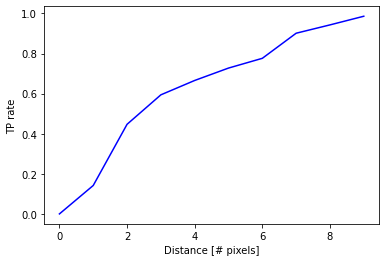

In [116]:
matches = pd.read_csv('masks_area.csv')
# print(matches.head())
# matches[[1,2,3,4]] = matches[[1,2,3,4]].apply(pd.to_numeric)
matches['distance'] = np.sqrt((matches['centroid_x']-matches['mask_centroid_x'])**2 + (matches['centroid_y'] - matches['mask_centroid_y'])**2)
total_area = 360**2

distance = 10
TPR = np.zeros([distance,1])
FPR = np.zeros([distance,1])
dist = np.zeros([distance,1])
for d in range(distance):
    tpr = 0
    fpr = 0
    totalP = matches['mask_area'].sum()
    totalN = len(matches) * total_area - totalP
    for i in range(len(matches)):
    #     totalP = matches['true_area'][i]
    #     totalN = total_area - totalP
        if matches['distance'][i] < d:
            tpr += matches['mask_area'][i]
#             fpr += 360**2 - matches['mask_area'][i]
            fpr += max(0, matches['mask_area'][i] - matches['true_area'][i])
        elif matches['distance'][i] >= d:
            tpr = tpr
            fpr = fpr
#             fpr += matches['mask_area'][i] - matches['true_area'][i]
#             fpr += 360**2 - matches['mask_area'][i]

    TPR[d] = tpr / totalP
    FPR[d] = fpr / totalN
    dist[d] = d
    
# plot the ROC curve:
plt.figure()
# plt.plot(FPR, TPR, 'b')
plt.plot(dist, TPR, 'b')
plt.ylabel('TP rate')
plt.xlabel('Distance [# pixels]')
# plt.xlabel('FP rate')


689


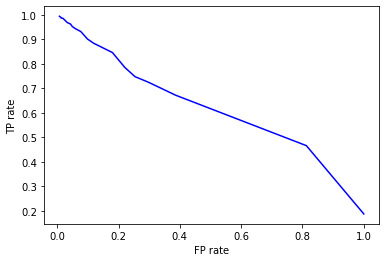

In [117]:
matches = pd.read_csv('masks.csv')
# matches[[1,2,3,4]] = matches[[1,2,3,4]].apply(pd.to_numeric)
matches['distance'] = np.sqrt((matches['centroid_x']-matches['mask_centroid_x'])**2 + (matches['centroid_y'] - matches['mask_centroid_y'])**2)
distance = 20
TPR = np.zeros([distance, 1])
FPR = np.zeros([distance, 1])
tpr = 0
fpr = 0
for d in reversed(range(distance)):
    for i in range(len(matches)):
        if matches['distance'][i] <= d:
            tpr += 1
        if matches['distance'][i] >= d:
            fpr += 1
        
    TPR[d] = tpr / len(matches)
    FPR[d] = fpr / len(matches)
#     print(tpr,fpr)
    tpr = 0
    fpr = 0

# plot the ROC curve:
plt.figure()
plt.plot(FPR, TPR, 'b')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
print(len(matches))